#Rough Set

In [ ]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("bodyfat.csv",sep=',')
df

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,69.96700,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,78.58500,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,69.85300,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,83.80100,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,83.57400,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,60.89500,170.180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
248,1.0236,72,91.17200,177.165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
249,1.0328,72,84.70800,167.640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
250,1.0399,72,86.52300,179.070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


In [ ]:
df=df.iloc[::,1:]         
#df1=df.iloc[::,:-1] #memisahkan antara variabel x dan y
df

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,23,69.96700,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,22,78.58500,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,22,69.85300,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,26,83.80100,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,24,83.57400,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,70,60.89500,170.180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
248,72,91.17200,177.165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
249,72,84.70800,167.640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
250,72,86.52300,179.070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


In [ ]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['quality'].value_counts()

In [ ]:
#Encoding dengan data sedikit
#cleanup_nums = {"quality":     {"good": 2, "bad": 1}}
#df = df.replace(cleanup_nums)
#df

#Core and Reduct

In [ ]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [ ]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['BodyFat']=faktor.iloc[::,-1]
    return df_CR

In [ ]:
df_CR=Core_and_Reduct(df)
df_CR

,Age,Weight,Height,BodyFat
0,23,69.96700,172.085,12.3
1,22,78.58500,183.515,6.1
2,22,69.85300,168.275,25.3
3,26,83.80100,183.515,10.4
4,24,83.57400,180.975,28.7
...,...,...,...,...
247,70,60.89500,170.180,11.0
248,72,91.17200,177.165,33.6
249,72,84.70800,167.640,29.3
250,72,86.52300,179.070,26.0


In [ ]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [ ]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import sys
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

,Unnamed: 0,Age,Weight,Height,BodyFat
0,0,23,69.96700,172.085,12.3
1,1,22,78.58500,183.515,6.1
2,2,22,69.85300,168.275,25.3
3,3,26,83.80100,183.515,10.4
4,4,24,83.57400,180.975,28.7
...,...,...,...,...,...
247,247,70,60.89500,170.180,11.0
248,248,72,91.17200,177.165,33.6
249,249,72,84.70800,167.640,29.3
250,250,72,86.52300,179.070,26.0


In [ ]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

,Age,Weight,Height,BodyFat
0,23,69.96700,172.085,12.3
1,22,78.58500,183.515,6.1
2,22,69.85300,168.275,25.3
3,26,83.80100,183.515,10.4
4,24,83.57400,180.975,28.7
...,...,...,...,...
247,70,60.89500,170.180,11.0
248,72,91.17200,177.165,33.6
249,72,84.70800,167.640,29.3
250,72,86.52300,179.070,26.0


#Split Data

In [ ]:
y = df_tsk.iloc[:,3:4]
X = df_tsk.drop(columns=['BodyFat'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train

,Age,Weight,Height
239,65,86.069,167.005
84,72,76.203,175.895
29,29,72.915,175.260
168,35,103.532,176.530
167,35,101.945,183.515
...,...,...,...
106,43,90.832,186.690
14,35,85.162,176.530
92,47,74.956,179.070
179,39,106.481,189.230


In [ ]:
y_train

,BodyFat
239,29.9
84,27.0
29,8.8
168,34.3
167,20.3
...,...
106,19.3
14,22.1
92,8.5
179,16.9


In [ ]:
y_test

,BodyFat
165,19.2
6,19.2
111,28.0
172,20.5
115,16.7
...,...
119,18.1
75,18.5
113,21.3
118,25.8


In [ ]:
y_test.to_csv('y test.csv') 

In [ ]:
X_test

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
X_test.to_csv('x test.csv') 

In [ ]:
X_train.describe()

,Age,Weight,Height
count,176.000000,176.000000,176.000000
mean,45.210227,81.141814,177.850511
std,12.652548,12.777630,10.279593
min,22.000000,53.751000,74.930000
25%,36.750000,72.546500,173.355000
50%,44.000000,80.059000,177.800000
75%,54.000000,90.151500,183.515000
max,81.000000,119.181000,197.485000


In [ ]:
X_train.isnull().sum()    #untuk mengecek nilai yang hilang

Age       0
Weight    0
Height    0
dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 239 to 102
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     176 non-null    int64  
 1   Weight  176 non-null    float64
 2   Height  176 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.5 KB


#Info Atribute
1. Density
2. Age (years)
3. Weight (lbs)
4. Height (inches)
5. Neck circumference (cm)
6. Chest circumference (cm)
7. Abdomen 2 circumference (cm)
8. Hip circumference (cm)
9. Thigh circumference (cm)
10. Knee circumference (cm)
11. Ankle circumference (cm)
12. Biceps (extended) Circumference (cm) 
13. Forearm circumference (cm)
14. Wrist circumference (cm)
15. bodyfat



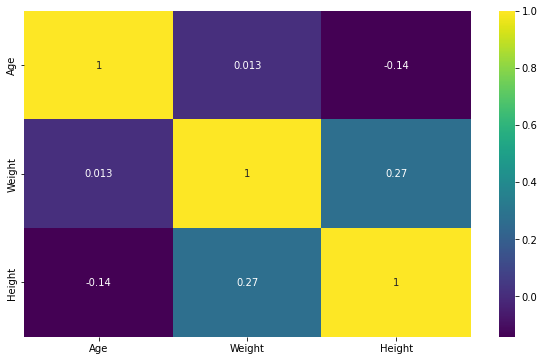

In [ ]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=X_train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

##Fuzzy A

In [ ]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [ ]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

##Pembentukan Himpunan Fuzzy



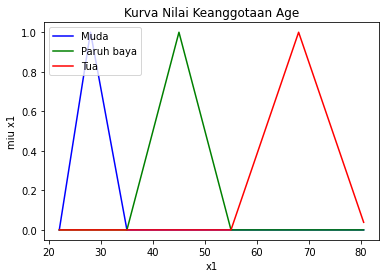

In [ ]:
# Pembentukan Himpunan Fuzzy Age [fungsi buat sendiri]
x_Age = np.arange(22, 81, 0.5) # Semesta Pembicaraan
amb_muda = [22, 28, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 68, 81]

miu_Age_muda = fungsi_segitiga(x_Age, amb_muda)
miu_Age_paruhbaya = fungsi_segitiga(x_Age, amb_paruhbaya)
miu_Age_tua = fungsi_segitiga(x_Age, amb_tua)

import matplotlib.pyplot as plt
plt.plot(x_Age, miu_Age_muda, label = "Muda", color='blue')
plt.plot(x_Age, miu_Age_paruhbaya, label = "Paruh baya", color='green')
plt.plot(x_Age, miu_Age_tua, label = "Tua", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Age')
plt.legend()
plt.savefig('Kurva Age.png',format='png',dbi=1000) #Display
plt.show()

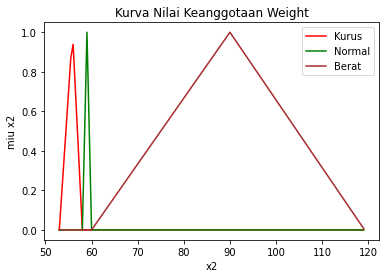

In [ ]:
# Pembentukan Himpunan Fuzzy Weight [fungsi buat sendiri]
x_Weight	= np.arange(53, 119.20, 0.5) # Semesta  Pembicaraan niali data kita
amb_kurus= [53, 55.87, 58]           #nilai interval dr teori 
amb_normal = [58, 59, 60]   
amb_berat = [60, 90, 119.20] 
 

miu_Weight_kurus = fungsi_segitiga(x_Weight, amb_kurus)
miu_Weight_normal = fungsi_segitiga(x_Weight, amb_normal)
miu_Weight_berat = fungsi_segitiga(x_Weight, amb_berat)

import matplotlib.pyplot as plt
plt.plot(x_Weight, miu_Weight_kurus, label = "Kurus", color='red')
plt.plot(x_Weight, miu_Weight_normal, label = "Normal", color='green')
plt.plot(x_Weight, miu_Weight_berat, label = "Berat", color='brown')

plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan Weight')
plt.legend()
plt.savefig('Kurva Weight.png',format='png',dbi=1000) # Display
plt.show()

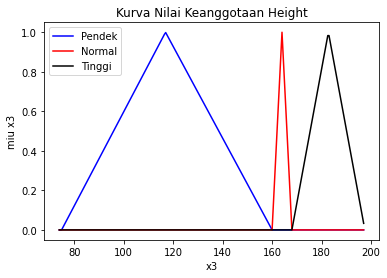

In [ ]:
# Pembentukan Himpunan Fuzzy Height[fungsi buat sendiri]
x_Height	= np.arange(74, 197.49, 0.5) # Semesta  Pembicaraan niali data kita
amb_pendek= [74.93, 116.93,160 ]           #nilai interval dr teori 
amb_normal = [160, 164, 168]   
amb_tinggi = [168, 182.75, 197.49 ] 

miu_Height_pendek = fungsi_segitiga(x_Height, amb_pendek)
miu_Height_normal = fungsi_segitiga(x_Height, amb_normal)
miu_Height_tinggi = fungsi_segitiga(x_Height, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_Height, miu_Height_pendek, label = "Pendek", color='blue')
plt.plot(x_Height, miu_Height_normal, label = "Normal", color='red')
plt.plot(x_Height, miu_Height_tinggi, label = "Tinggi", color='black')

plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Height')
plt.legend()
plt.savefig('Kurva Height.png',format='png',dbi=1000) # Display
plt.show()

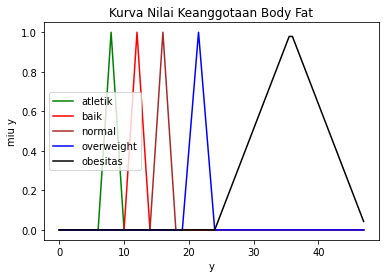

In [ ]:
# Pembentukan Himpunan Fuzzy Body Fat [fungsi buat sendiri]
x_BodyFat	= np.arange(0, 47.5, 0.5) #  Semesta Pembicaraan nilai data kita
amb_atletik = [6, 8, 10]
amb_baik = [10, 12, 14]
amb_normal = [14, 16, 18]
amb_overweight = [19, 21.5, 24]
amb_obesitas = [24, 35.75, 47.5]

miu_BodyFat_atletik = fungsi_segitiga(x_BodyFat, amb_atletik)
miu_BodyFat_baik = fungsi_segitiga(x_BodyFat, amb_baik)
miu_BodyFat_normal = fungsi_segitiga(x_BodyFat, amb_normal)
miu_BodyFat_overweight = fungsi_segitiga(x_BodyFat, amb_overweight)
miu_BodyFat_obesitas = fungsi_segitiga(x_BodyFat, amb_obesitas)

import matplotlib.pyplot as plt
plt.plot(x_BodyFat, miu_BodyFat_atletik, label = "atletik", color='green')
plt.plot(x_BodyFat, miu_BodyFat_baik, label = "baik", color='red')
plt.plot(x_BodyFat, miu_BodyFat_normal, label = "normal", color='brown')
plt.plot(x_BodyFat, miu_BodyFat_overweight, label = "overweight", color='blue')
plt.plot(x_BodyFat, miu_BodyFat_obesitas , label = "obesitas", color='black')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Body Fat')
plt.legend()
plt.savefig('Kurva bodyfat.png',format='png',dbi=1000) # Display
plt.show()

#Perhitungan Nilai Miu

In [ ]:
#X1 AGE
def fuzzyfikasi(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-68
    tengah = awal+20

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x1
x_Age= np.arange(22, 82, 0.5) # Semesta Pembicaraan
amb_muda = [22, 28, 35]
amb_paruhbaya = [35, 45, 55]
amb_tua = [55, 68, 81]

fuzzifikasi_Age=[]
miu_Age=[]
for i in X_train.Age:
    hasil=fuzzyfikasi(x_Age, amb_muda, amb_paruhbaya, amb_tua, i, "Muda", "Paruhbaya", "Tua")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Age.append(fuzz)
    miu_Age.append(m)
    
len(fuzzifikasi_Age)

103.5
35.5
55.5
{22.0: 0.0, 22.5: 0.0, 23.0: 0.0, 23.5: 0.0, 24.0: 0.0, 24.5: 0.0, 25.0: 0.0, 25.5: 0.0, 26.0: 0.0, 26.5: 0.0, 27.0: 0.0, 27.5: 0.0, 28.0: 0.0, 28.5: 0.0, 29.0: 0.0, 29.5: 0.0, 30.0: 0.0, 30.5: 0.0, 31.0: 0.0, 31.5: 0.0, 32.0: 0.0, 32.5: 0.0, 33.0: 0.0, 33.5: 0.0, 34.0: 0.0, 34.5: 0.0, 35.0: 0.0, 35.5: 0.0, 36.0: 0.0, 36.5: 0.0, 37.0: 0.0, 37.5: 0.0, 38.0: 0.0, 38.5: 0.0, 39.0: 0.0, 39.5: 0.0, 40.0: 0.0, 40.5: 0.0, 41.0: 0.0, 41.5: 0.0, 42.0: 0.0, 42.5: 0.0, 43.0: 0.0, 43.5: 0.0, 44.0: 0.0, 44.5: 0.0, 45.0: 0.0, 45.5: 0.0, 46.0: 0.0, 46.5: 0.0, 47.0: 0.0, 47.5: 0.0, 48.0: 0.0, 48.5: 0.0, 49.0: 0.0, 49.5: 0.0, 50.0: 0.0, 50.5: 0.0, 51.0: 0.0, 51.5: 0.0, 52.0: 0.0, 52.5: 0.0, 53.0: 0.0, 53.5: 0.0, 54.0: 0.0, 54.5: 0.0, 55.0: 0.0, 55.5: 0.038461538461538464, 56.0: 0.07692307692307693, 56.5: 0.11538461538461539, 57.0: 0.15384615384615385, 57.5: 0.19230769230769232, 58.0: 0.23076923076923078, 58.5: 0.2692307692307692, 59.0: 0.3076923076923077, 59.5: 0.34615384615384615, 60.0

176

In [ ]:
#X2 (WEIGHT)
def fuzzyfikasi1(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas   = (max(x_array)+min(x_array))/3
    awal    = batas+0.36
    tengah  = awal+2

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal< x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x2
x_Weight	= np.arange(53, 119.20, 0.5) # Semesta  Pembicaraan niali data kita
amb_kurus= [53.75, 55.87, 58]           #nilai interval dr teori 
amb_normal = [58, 59, 60]   
amb_berat = [60, 90, 119.20] 

fuzzifikasi_Weight=[]
miu_Weight=[]
for i in X_train.Weight:
    hasil=fuzzyfikasi1(x_Weight, amb_kurus, amb_normal, amb_berat, i, "Kurus", "Normal", "Berat")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_Weight.append(fuzz)
    miu_Weight.append(m)
    
len(fuzzifikasi_Weight)

57.333333333333336
57.693333333333335
59.693333333333335
{53.0: 0.0, 53.5: 0.0, 54.0: 0.0, 54.5: 0.0, 55.0: 0.0, 55.5: 0.0, 56.0: 0.0, 56.5: 0.0, 57.0: 0.0, 57.5: 0.0, 58.0: 0.0, 58.5: 0.0, 59.0: 0.0, 59.5: 0.0, 60.0: 0.0, 60.5: 0.016666666666666666, 61.0: 0.03333333333333333, 61.5: 0.05, 62.0: 0.06666666666666667, 62.5: 0.08333333333333333, 63.0: 0.1, 63.5: 0.11666666666666667, 64.0: 0.13333333333333333, 64.5: 0.15, 65.0: 0.16666666666666666, 65.5: 0.18333333333333332, 66.0: 0.2, 66.5: 0.21666666666666667, 67.0: 0.23333333333333334, 67.5: 0.25, 68.0: 0.26666666666666666, 68.5: 0.2833333333333333, 69.0: 0.3, 69.5: 0.31666666666666665, 70.0: 0.3333333333333333, 70.5: 0.35, 71.0: 0.36666666666666664, 71.5: 0.38333333333333336, 72.0: 0.4, 72.5: 0.4166666666666667, 73.0: 0.43333333333333335, 73.5: 0.45, 74.0: 0.4666666666666667, 74.5: 0.48333333333333334, 75.0: 0.5, 75.5: 0.5166666666666667, 76.0: 0.5333333333333333, 76.5: 0.55, 77.0: 0.5666666666666667, 77.5: 0.5833333333333334, 78.0: 0.6

176

In [ ]:
#X3 (HEIGHT)
def fuzzyfikasi2(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas   = (max(x_array)+min(x_array))/2
    awal    = batas+23.79
    tengah  = awal+8

    print(batas)
    print(awal)
    print(tengah)

    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal< x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#Miu x3
x_Height	= np.arange(73, 197.49, 0.5) # Semesta  Pembicaraan niali data kita
amb_pendek= [74.93, 116.93,160 ]           #nilai interval dr teori 
amb_normal = [160, 164, 168]   
amb_tinggi = [168, 182.75, 197.49 ] 


fuzzifikasi_Height=[]
miu_Height=[]
for i in X_train.Height:
    hasil=fuzzyfikasi2(x_Height, amb_pendek, amb_normal, amb_tinggi, i, "Pendek", "Normal", "Tinggi")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_Height.append(fuzz)
    miu_Height.append(m)
len(fuzzifikasi_Height)

135.0
158.79
166.79
{73.0: 0.0, 73.5: 0.0, 74.0: 0.0, 74.5: 0.0, 75.0: 0.0, 75.5: 0.0, 76.0: 0.0, 76.5: 0.0, 77.0: 0.0, 77.5: 0.0, 78.0: 0.0, 78.5: 0.0, 79.0: 0.0, 79.5: 0.0, 80.0: 0.0, 80.5: 0.0, 81.0: 0.0, 81.5: 0.0, 82.0: 0.0, 82.5: 0.0, 83.0: 0.0, 83.5: 0.0, 84.0: 0.0, 84.5: 0.0, 85.0: 0.0, 85.5: 0.0, 86.0: 0.0, 86.5: 0.0, 87.0: 0.0, 87.5: 0.0, 88.0: 0.0, 88.5: 0.0, 89.0: 0.0, 89.5: 0.0, 90.0: 0.0, 90.5: 0.0, 91.0: 0.0, 91.5: 0.0, 92.0: 0.0, 92.5: 0.0, 93.0: 0.0, 93.5: 0.0, 94.0: 0.0, 94.5: 0.0, 95.0: 0.0, 95.5: 0.0, 96.0: 0.0, 96.5: 0.0, 97.0: 0.0, 97.5: 0.0, 98.0: 0.0, 98.5: 0.0, 99.0: 0.0, 99.5: 0.0, 100.0: 0.0, 100.5: 0.0, 101.0: 0.0, 101.5: 0.0, 102.0: 0.0, 102.5: 0.0, 103.0: 0.0, 103.5: 0.0, 104.0: 0.0, 104.5: 0.0, 105.0: 0.0, 105.5: 0.0, 106.0: 0.0, 106.5: 0.0, 107.0: 0.0, 107.5: 0.0, 108.0: 0.0, 108.5: 0.0, 109.0: 0.0, 109.5: 0.0, 110.0: 0.0, 110.5: 0.0, 111.0: 0.0, 111.5: 0.0, 112.0: 0.0, 112.5: 0.0, 113.0: 0.0, 113.5: 0.0, 114.0: 0.0, 114.5: 0.0, 115.0: 0.0, 115.5: 0.0, 1

176

In [ ]:
#Y (BODYFAT)
def fuzzyfikasi4(x_array, amd_1, amd_2, amd_3, amd_4, amd_5, x, label_1, label_2, label_3, label_4, label_5):
    batas = (max(x_array)+min(x_array))/2
    awal  = batas-16.75
    tengah = awal+4
    akhir1 = tengah+4
    akhir2 = akhir1+6

    print(batas)
    hasil=0
    if x <=awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif batas < x <= tengah:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil= label_2
    elif tengah < x <= akhir1:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil= label_3
    elif akhir1 < x <= akhir2:
        hasil=miu_fungsi_segitiga(x_array, amd_4, x)
        label_hasil= label_4
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_5, x)
        label_hasil = label_5
    return hasil, label_hasil

In [ ]:
#Miu y 
x_BodyFat	= np.arange(0, 47.5, 0.5) #  Semesta Pembicaraan nilai data kita
amb_atletik = [6, 8, 10]
amb_baik = [11, 12.5, 14]
amb_normal = [15, 16.5, 18]
amb_overweight = [19, 21.5, 24]
amb_obesitas = [25, 36.25, 47.5]

fuzzifikasi_BodyFat=[]
miu_BodyFat=[]
for i in y_train.BodyFat:
    hasil=fuzzyfikasi4(x_BodyFat, amb_atletik, amb_baik, amb_normal, amb_overweight, amb_obesitas, i, "atletik", "baik", "normal", "overweight", "obesitas")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_BodyFat.append(fuzz)
    miu_BodyFat.append(m)
len(fuzzifikasi_BodyFat)

23.5
{0.0: 0.0, 0.5: 0.0, 1.0: 0.0, 1.5: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 3.5: 0.0, 4.0: 0.0, 4.5: 0.0, 5.0: 0.0, 5.5: 0.0, 6.0: 0.0, 6.5: 0.0, 7.0: 0.0, 7.5: 0.0, 8.0: 0.0, 8.5: 0.0, 9.0: 0.0, 9.5: 0.0, 10.0: 0.0, 10.5: 0.0, 11.0: 0.0, 11.5: 0.0, 12.0: 0.0, 12.5: 0.0, 13.0: 0.0, 13.5: 0.0, 14.0: 0.0, 14.5: 0.0, 15.0: 0.0, 15.5: 0.0, 16.0: 0.0, 16.5: 0.0, 17.0: 0.0, 17.5: 0.0, 18.0: 0.0, 18.5: 0.0, 19.0: 0.0, 19.5: 0.0, 20.0: 0.0, 20.5: 0.0, 21.0: 0.0, 21.5: 0.0, 22.0: 0.0, 22.5: 0.0, 23.0: 0.0, 23.5: 0.0, 24.0: 0.0, 24.5: 0.0, 25.0: 0.0, 25.5: 0.044444444444444446, 26.0: 0.08888888888888889, 26.5: 0.13333333333333333, 27.0: 0.17777777777777778, 27.5: 0.2222222222222222, 28.0: 0.26666666666666666, 28.5: 0.3111111111111111, 29.0: 0.35555555555555557, 29.5: 0.4, 30.0: 0.4444444444444444, 30.5: 0.4888888888888889, 31.0: 0.5333333333333333, 31.5: 0.5777777777777777, 32.0: 0.6222222222222222, 32.5: 0.6666666666666666, 33.0: 0.7111111111111111, 33.5: 0.7555555555555555, 34.0: 0.8, 34.5: 0.

176

In [ ]:
df_fuzz = pd.DataFrame({"Age":X_train.Age,
                        "Weight":X_train.Weight,
                        "Height":X_train.Height,
                        "BodyFat":y_train.BodyFat,
                        "Age_fuzz": fuzzifikasi_Age,
                        "Weight_fuzz": fuzzifikasi_Weight,
                        "Height_fuzz": fuzzifikasi_Height,
                        "BodyFat_fuzz": fuzzifikasi_BodyFat,
                        "miu_Age":miu_Age,
                        "miu_Weight":miu_Weight,
                        "miu_Height":miu_Height,
                        "miu_BodyFat":miu_BodyFat,})
df_fuzz

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
239,65,86.069,167.005,29.9,Tua,Berat,Tinggi,obesitas,0.769231,0.866667,0.000000,0.355556
84,72,76.203,175.895,27.0,Tua,Berat,Tinggi,obesitas,0.692308,0.533333,0.474576,0.177778
29,29,72.915,175.260,8.8,Muda,Berat,Tinggi,obesitas,0.857143,0.400000,0.474576,0.000000
168,35,103.532,176.530,34.3,Muda,Berat,Tinggi,obesitas,0.000000,0.554795,0.542373,0.800000
167,35,101.945,183.515,20.3,Muda,Berat,Tinggi,overweight,0.000000,0.623288,0.983039,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
106,43,90.832,186.690,19.3,Paruhbaya,Berat,Tinggi,overweight,0.800000,1.000000,0.779512,0.000000
14,35,85.162,176.530,22.1,Muda,Berat,Tinggi,obesitas,0.000000,0.833333,0.542373,0.000000
92,47,74.956,179.070,8.5,Paruhbaya,Berat,Tinggi,obesitas,0.800000,0.466667,0.745763,0.000000
179,39,106.481,189.230,16.9,Paruhbaya,Berat,Tinggi,overweight,0.400000,0.452055,0.575984,0.000000


# Rule Generation

In [ ]:
df_fuzz['Rule'] = "Jika X1 " + df_fuzz['Age_fuzz'] + " X2 " + df_fuzz['Weight_fuzz'] + " X3 " + df_fuzz['Height_fuzz'] + " maka Y " + df_fuzz['BodyFat_fuzz']

In [ ]:
df_fuzz.to_excel('hasilRuleMBGD.xlsx') 

In [ ]:
df_fuzz['Rule'].value_counts()

Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y obesitas      47
Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas            29
Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y overweight    26
Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas           20
Jika X1 Muda X2 Berat X3 Tinggi maka Y overweight         11
Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y normal        10
Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y atletik        6
Jika X1 Tua X2 Berat X3 Tinggi maka Y overweight           6
Jika X1 Muda X2 Berat X3 Tinggi maka Y normal              5
Jika X1 Paruhbaya X2 Berat X3 Normal maka Y obesitas       3
Jika X1 Muda X2 Berat X3 Tinggi maka Y atletik             3
Jika X1 Muda X2 Berat X3 Normal maka Y atletik             1
Jika X1 Tua X2 Normal X3 Tinggi maka Y overweight          1
Jika X1 Paruhbaya X2 Berat X3 Pendek maka Y obesitas       1
Jika X1 Muda X2 Normal X3 Tinggi maka Y obesitas           1
Jika X1 Paruhbaya X2 Kurus X3 Tinggi maka Y atletik        1
Jika X1 Paruhbaya X2 Kur

# TSK Prediction

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [ ]:
rule_1 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y obesitas"]
index=rule_1.index  #index untuk menyimpan label sumbu pada semua objek panda. 
data_rule_1=rule_1.iloc[:,0:4]
X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])
data_rule_1.head()

,Age,Weight,Height,BodyFat
227,55,90.038,188.595,25.2
65,55,83.234,171.450,30.0
137,43,85.162,187.960,29.4
42,48,98.429,177.800,31.6
221,54,104.326,183.515,26.0


In [ ]:
data_rule_1.to_csv('hasilrule1.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1

,Unnamed: 0,Age,Weight,Height,BodyFat
0,227,55,90.038,188.595,25.2
1,65,55,83.234,171.450,30.0
2,137,43,85.162,187.960,29.4
3,42,48,98.429,177.800,31.6
4,221,54,104.326,183.515,26.0
5,93,46,87.316,182.245,24.9
6,104,43,80.286,175.895,25.4
7,114,48,79.492,182.245,26.7
8,201,43,68.039,175.895,22.1
9,100,49,90.038,186.690,21.2


In [ ]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1

,Age,Weight,Height,BodyFat
0,55,90.038,188.595,25.2
1,55,83.234,171.450,30.0
2,43,85.162,187.960,29.4
3,48,98.429,177.800,31.6
4,54,104.326,183.515,26.0
5,46,87.316,182.245,24.9
6,43,80.286,175.895,25.4
7,48,79.492,182.245,26.7
8,43,68.039,175.895,22.1
9,49,90.038,186.690,21.2


In [ ]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('BodyFat',axis='columns'))
scaled_y1 = sy1.fit_transform(data_rule_1['BodyFat'].values.reshape(rule_1.shape[0],1))

scaled_X1

array([[1.        , 0.48804567, 0.81081081],
       [1.        , 0.36851998, 0.08108108],
       [0.36842105, 0.40238911, 0.78378378],
       [0.63157895, 0.63545015, 0.35135135],
       [0.94736842, 0.7390426 , 0.59459459],
       [0.52631579, 0.44022837, 0.54054054],
       [0.36842105, 0.31673254, 0.27027027],
       [0.63157895, 0.30278437, 0.54054054],
       [0.36842105, 0.10158981, 0.27027027],
       [0.68421053, 0.48804567, 0.72972973],
       [0.05263158, 0.82868687, 0.51351351],
       [0.21052632, 0.5179271 , 0.35135135],
       [0.15789474, 0.65338603, 0.81081081],
       [0.21052632, 0.24700922, 0.48648649],
       [0.94736842, 0.44621871, 0.37837838],
       [0.42105263, 0.38844093, 0.32432432],
       [0.21052632, 0.4382433 , 0.7027027 ],
       [0.31578947, 0.20317962, 0.64864865],
       [0.47368421, 1.        , 0.21621622],
       [0.21052632, 0.24103645, 0.51351351],
       [0.73684211, 0.52389987, 0.02702703],
       [0.68421053, 0.62947738, 0.83783784],
       [0.

In [ ]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

array([0.58387097, 0.73870968, 0.71935484, 0.79032258, 0.60967742,
       0.57419355, 0.59032258, 0.63225806, 0.48387097, 0.45483871,
       0.73548387, 0.5516129 , 0.62903226, 0.49354839, 0.76129032,
       0.64516129, 0.44193548, 0.50645161, 0.88387097, 0.0483871 ,
       0.82258065, 0.6483871 , 0.06129032, 0.80322581, 0.61290323,
       0.59354839, 0.81290323, 0.08064516, 0.01290323, 0.50322581,
       0.55806452, 0.1       , 0.58709677, 0.55806452, 0.82903226,
       0.78709677, 0.03870968, 1.        , 0.68709677, 0.02903226,
       0.49032258, 0.48709677, 0.69677419, 0.        , 0.58709677,
       0.05483871, 0.04516129])

In [ ]:
def mini_batch_gradient_descent_rule1(X1, y1, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule1 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X1_smntr = X1[random_indices]
        y1_smntr = y1[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule1 = X1_smntr[j:j+batch_size]
            yj_rule1 = y1_smntr[j:j+batch_size]
            
            y1_pred = np.dot(bpoly_rule1, Xj_rule1.T) + b0_rule1           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule1_grad = -(2/len(Xj_rule1))*(Xj_rule1.T.dot(yj_rule1-y1_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule1_grad = -(2/len(Xj_rule1))*np.sum(yj_rule1-y1_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad        # Memperbaharui bpoly(bobot) setiap iterasi
            b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                 # Memperbaharui bpoly(bobot) setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule1 in range(jumlah_variabel_rule1):
                bp_rule1=bpoly_rule1[jv_rule1]
                bp.append(bp_rule1)
            b_rule1=[b0_rule1]+bp
        
            cost_rule1 = np.mean(np.square(yj_rule1-y1_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [ ]:
import time
mulai_rule1 = time.time()
mb_bpoly_rule1, mb_b0_rule1, mb_cost_rule1, mb_b_rule1_list, mb_cost_rule1_list, mb_iterasi_rule1_list=mini_batch_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                        scaled_y1_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

Waktu Komputasi Rule 1:  5.955597162246704


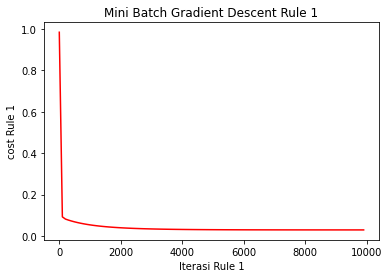

In [ ]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Mini Batch Gradient Descent Rule 1")
plt.plot(mb_iterasi_rule1_list,mb_cost_rule1_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule1

0.028982547352344998

In [ ]:
mb_b0_rule1

0.23055823302610737

In [ ]:
mb_bpoly_rule1 #hasil untuk x1 dan x2

array([-0.03143335,  1.01591899, -0.27247678])

###Regresi

In [ ]:
mb_regresi_rule1=pd.DataFrame([mb_bpoly_rule1], columns=['b1', 'b2', 'b3'])
mb_regresi_rule1

,b1,b2,b3
0,-0.031433,1.015919,-0.272477


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
data2=y_test
data2

,BodyFat
165,19.2
6,19.2
111,28.0
172,20.5
115,16.7
...,...
119,18.1
75,18.5
113,21.3
118,25.8


In [ ]:
mb_bpoly_rule1 = mb_regresi_rule1.T
mb_bpoly_rule1

,0
b1,-0.031433
b2,1.015919
b3,-0.272477


In [ ]:
y1_awal=np.dot(data ,mb_bpoly_rule1)
y1_awal

array([[ 47.85400967],
       [ 34.31633271],
       [ 34.64619636],
       [ 31.4402406 ],
       [ 23.62424447],
       [ 23.85422502],
       [ 30.61616327],
       [ 29.09749118],
       [ 39.76485748],
       [ 31.82059573],
       [ 46.89114355],
       [ 40.52466107],
       [ 29.14386878],
       [ 31.21992847],
       [ 21.91631073],
       [ 15.27954845],
       [ 22.92776086],
       [ 28.21899656],
       [ 28.72725264],
       [ 21.92883722],
       [ 23.88674471],
       [ 45.670996  ],
       [ 31.05185572],
       [ 26.59481118],
       [ 50.26050077],
       [ 56.04030137],
       [ 54.57810527],
       [ 21.60233162],
       [ 33.44881934],
       [ 36.28585491],
       [ 31.05246027],
       [ 35.0877692 ],
       [ 29.13983054],
       [ 35.30838857],
       [ 39.20612813],
       [ 23.05169921],
       [ 28.46205071],
       [ 36.90551498],
       [ 44.28860897],
       [ 19.3629647 ],
       [ 20.09705896],
       [ 38.60745387],
       [ 46.1782568 ],
       [ 22

In [ ]:
z1 = y1_awal + mb_b0_rule1
z1

array([[ 48.0845679 ],
       [ 34.54689094],
       [ 34.8767546 ],
       [ 31.67079884],
       [ 23.85480271],
       [ 24.08478326],
       [ 30.8467215 ],
       [ 29.32804941],
       [ 39.99541571],
       [ 32.05115396],
       [ 47.12170179],
       [ 40.7552193 ],
       [ 29.37442701],
       [ 31.4504867 ],
       [ 22.14686897],
       [ 15.51010668],
       [ 23.15831909],
       [ 28.44955479],
       [ 28.95781087],
       [ 22.15939545],
       [ 24.11730295],
       [ 45.90155424],
       [ 31.28241396],
       [ 26.82536941],
       [ 50.491059  ],
       [ 56.2708596 ],
       [ 54.8086635 ],
       [ 21.83288986],
       [ 33.67937758],
       [ 36.51641315],
       [ 31.2830185 ],
       [ 35.31832744],
       [ 29.37038877],
       [ 35.5389468 ],
       [ 39.43668636],
       [ 23.28225744],
       [ 28.69260894],
       [ 37.13607321],
       [ 44.5191672 ],
       [ 19.59352294],
       [ 20.32761719],
       [ 38.83801211],
       [ 46.40881503],
       [ 23

In [ ]:
data2['z1'] = z1
data2

,BodyFat,z1
165,19.2,48.084568
6,19.2,34.546891
111,28.0,34.876755
172,20.5,31.670799
115,16.7,23.854803
...,...,...
119,18.1,35.246808
75,18.5,19.912452
113,21.3,25.402933
118,25.8,35.773646


###Komposisi aturan

In [ ]:
data_rule_1=rule_1.iloc[:,0:12]
data_rule_1

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
227,55,90.038,188.595,25.2,Paruhbaya,Berat,Tinggi,obesitas,0.0,1.000000,0.643826,0.000000
65,55,83.234,171.450,30.0,Paruhbaya,Berat,Tinggi,obesitas,0.0,0.766667,0.203390,0.444444
137,43,85.162,187.960,29.4,Paruhbaya,Berat,Tinggi,obesitas,0.8,0.833333,0.711669,0.355556
42,48,98.429,177.800,31.6,Paruhbaya,Berat,Tinggi,obesitas,0.7,0.726027,0.610169,0.533333
221,54,104.326,183.515,26.0,Paruhbaya,Berat,Tinggi,obesitas,0.1,0.520548,0.983039,0.088889
93,46,87.316,182.245,24.9,Paruhbaya,Berat,Tinggi,obesitas,0.9,0.900000,0.949153,0.000000
104,43,80.286,175.895,25.4,Paruhbaya,Berat,Tinggi,obesitas,0.8,0.666667,0.474576,0.000000
114,48,79.492,182.245,26.7,Paruhbaya,Berat,Tinggi,obesitas,0.7,0.633333,0.949153,0.088889
201,43,68.039,175.895,22.1,Paruhbaya,Berat,Tinggi,obesitas,0.8,0.266667,0.474576,0.000000
100,49,90.038,186.690,21.2,Paruhbaya,Berat,Tinggi,obesitas,0.6,1.000000,0.779512,0.000000


In [ ]:
data_rule_1['alpha_predikat']=data_rule_1[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_1

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
227,55,90.038,188.595,25.2,Paruhbaya,Berat,Tinggi,obesitas,0.0,1.000000,0.643826,0.000000,0.000000
65,55,83.234,171.450,30.0,Paruhbaya,Berat,Tinggi,obesitas,0.0,0.766667,0.203390,0.444444,0.000000
137,43,85.162,187.960,29.4,Paruhbaya,Berat,Tinggi,obesitas,0.8,0.833333,0.711669,0.355556,0.711669
42,48,98.429,177.800,31.6,Paruhbaya,Berat,Tinggi,obesitas,0.7,0.726027,0.610169,0.533333,0.610169
221,54,104.326,183.515,26.0,Paruhbaya,Berat,Tinggi,obesitas,0.1,0.520548,0.983039,0.088889,0.100000
93,46,87.316,182.245,24.9,Paruhbaya,Berat,Tinggi,obesitas,0.9,0.900000,0.949153,0.000000,0.900000
104,43,80.286,175.895,25.4,Paruhbaya,Berat,Tinggi,obesitas,0.8,0.666667,0.474576,0.000000,0.474576
114,48,79.492,182.245,26.7,Paruhbaya,Berat,Tinggi,obesitas,0.7,0.633333,0.949153,0.088889,0.633333
201,43,68.039,175.895,22.1,Paruhbaya,Berat,Tinggi,obesitas,0.8,0.266667,0.474576,0.000000,0.266667
100,49,90.038,186.690,21.2,Paruhbaya,Berat,Tinggi,obesitas,0.6,1.000000,0.779512,0.000000,0.600000


In [ ]:
print(data_rule_1.alpha_predikat)

227    0.000000
65     0.000000
137    0.711669
42     0.610169
221    0.100000
93     0.900000
104    0.474576
114    0.633333
201    0.266667
100    0.600000
177    0.200000
36     0.500000
180    0.400000
138    0.500000
62     0.100000
135    0.610169
128    0.500000
194    0.433333
40     0.006849
185    0.500000
39     0.135593
211    0.575984
94     0.575984
43     0.600000
133    0.067797
195    0.338983
34     0.246575
208    0.400000
217    0.333333
131    0.500000
134    0.533333
50     0.366667
174    0.100000
189    0.338983
207    0.800000
58     0.100000
88     0.666667
191    0.304613
37     0.338983
52     0.066667
103    0.600000
99     0.800000
202    0.800000
210    0.100000
121    0.800000
71     0.000000
92     0.466667
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data1=min(data_rule_1.alpha_predikat)
alpha_predikat_data1

0.0

##Rule 2


In [ ]:
rule_2 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua X2 Berat X3 Tinggi maka Y obesitas"]
index=rule_2.index
data_rule_2=rule_2.iloc[:,0:4]
data_rule_2

,Age,Weight,Height,BodyFat
239,65,86.06900,167.005,29.9
84,72,76.20300,175.895,27.0
233,58,73.36900,170.815,26.7
76,57,73.70900,176.530,8.8
236,62,86.86300,183.515,24.8
78,81,73.14200,178.435,21.5
243,67,103.30600,184.785,32.6
77,69,80.62600,173.990,22.2
85,67,75.75000,171.450,26.6
61,56,81.08000,173.990,29.8


In [ ]:
data_rule_2.to_csv('hasilrule2.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule2=pd.read_csv('hasilrule2.csv',sep=',')
df_rule2

,Unnamed: 0,Age,Weight,Height,BodyFat
0,239,65,86.06900,167.005,29.9
1,84,72,76.20300,175.895,27.0
2,233,58,73.36900,170.815,26.7
3,76,57,73.70900,176.530,8.8
4,236,62,86.86300,183.515,24.8
5,78,81,73.14200,178.435,21.5
6,243,67,103.30600,184.785,32.6
7,77,69,80.62600,173.990,22.2
8,85,67,75.75000,171.450,26.6
9,61,56,81.08000,173.990,29.8


In [ ]:
df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
df_rule2

,Age,Weight,Height,BodyFat
0,65,86.06900,167.005,29.9
1,72,76.20300,175.895,27.0
2,58,73.36900,170.815,26.7
3,57,73.70900,176.530,8.8
4,62,86.86300,183.515,24.8
5,81,73.14200,178.435,21.5
6,67,103.30600,184.785,32.6
7,69,80.62600,173.990,22.2
8,67,75.75000,171.450,26.6
9,56,81.08000,173.990,29.8


In [ ]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('BodyFat',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['BodyFat'].values.reshape(rule_2.shape[0],1))

scaled_X2

array([[0.36      , 0.52499449, 0.        ],
       [0.64      , 0.25311398, 0.4375    ],
       [0.08      , 0.17501653, 0.1875    ],
       [0.04      , 0.18438602, 0.46875   ],
       [0.24      , 0.546875  , 0.8125    ],
       [1.        , 0.16876102, 0.5625    ],
       [0.44      , 1.        , 0.875     ],
       [0.52      , 0.375     , 0.34375   ],
       [0.44      , 0.24063051, 0.21875   ],
       [0.        , 0.38751102, 0.34375   ],
       [0.52      , 0.84686398, 0.59375   ],
       [0.24      , 0.24688602, 0.71875   ],
       [0.04      , 0.72186398, 0.53125   ],
       [0.64      , 0.53750551, 0.59375   ],
       [0.32      , 0.03125   , 0.1875    ],
       [0.16      , 0.125     , 0.21875   ],
       [0.44      , 0.20001102, 0.25      ],
       [0.56      , 0.28750551, 0.53125   ],
       [0.04      , 0.        , 0.        ],
       [0.2       , 0.39999449, 0.        ],
       [0.        , 0.16250551, 1.        ],
       [0.2       , 0.37811398, 0.15625   ],
       [0.

In [ ]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

array([0.80754717, 0.69811321, 0.68679245, 0.01132075, 0.61509434,
       0.49056604, 0.90943396, 0.51698113, 0.68301887, 0.80377358,
       0.81886792, 0.59622642, 0.89811321, 0.66037736, 0.69056604,
       0.65283019, 0.86415094, 0.69811321, 0.07924528, 0.60754717,
       0.        , 0.65283019, 1.        , 0.94716981, 0.73584906,
       0.77358491, 0.70943396, 0.5509434 , 0.66037736])

In [ ]:
def mini_batch_gradient_descent_rule2(X2, y2, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule2 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X2_smntr = X2[random_indices]
        y2_smntr = y2[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule2 = X2_smntr[j:j+batch_size]
            yj_rule2 = y2_smntr[j:j+batch_size]
            
            y2_pred = np.dot(bpoly_rule2, Xj_rule2.T) + b0_rule2           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule2_grad = -(2/len(Xj_rule2))*(Xj_rule2.T.dot(yj_rule2-y2_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule2_grad = -(2/len(Xj_rule2))*np.sum(yj_rule2-y2_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule2 in range(jumlah_variabel_rule2):
                bp_rule2=bpoly_rule2[jv_rule2]
                bp.append(bp_rule2)
            b_rule2=[b0_rule2]+bp
        
            cost_rule2 = np.mean(np.square(yj_rule2-y2_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [ ]:
import time
mulai_rule2 = time.time()
mb_bpoly_rule2, mb_b0_rule2, mb_cost_rule2, mb_b_rule2_list, mb_cost_rule2_list, mb_iterasi_rule2_list=mini_batch_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

Waktu Komputasi Rule 2:  4.202572822570801


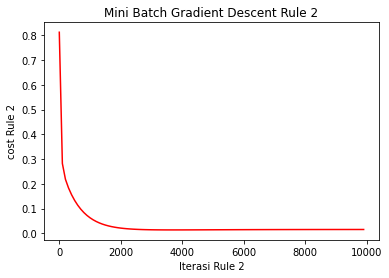

In [ ]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(mb_iterasi_rule2_list,mb_cost_rule2_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule2

0.01538485347787002

In [ ]:
mb_b0_rule2

0.43818235693792373

In [ ]:
mb_bpoly_rule2 #hasil untuk x1 dan x2

array([ 0.276055  ,  0.56456101, -0.31684439])

###Regresi

In [ ]:
mb_regresi_rule2=pd.DataFrame([mb_bpoly_rule2], columns=['b1', 'b2', 'b3'])
mb_regresi_rule2

,b1,b2,b3
0,0.276055,0.564561,-0.316844


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
data2=y_test
data2

,BodyFat,z1
165,19.2,48.084568
6,19.2,34.546891
111,28.0,34.876755
172,20.5,31.670799
115,16.7,23.854803
...,...,...
119,18.1,35.246808
75,18.5,19.912452
113,21.3,25.402933
118,25.8,35.773646


In [ ]:
mb_bpoly_rule2 = mb_regresi_rule2.T
mb_bpoly_rule2

,0
b1,0.276055
b2,0.564561
b3,-0.316844


In [ ]:
y2_awal=np.dot(data,mb_bpoly_rule2)
y2_awal

array([[  5.87822481],
       [ -2.60584789],
       [  2.46230779],
       [ -2.08765206],
       [ -4.22818587],
       [ -4.31047216],
       [  1.27320877],
       [  6.00619703],
       [ -2.03426586],
       [ -3.91234619],
       [ 13.47835619],
       [  7.63544874],
       [  3.66217417],
       [ -3.59426446],
       [ -1.06798794],
       [-14.63388375],
       [ -3.92314111],
       [ -1.77684603],
       [ -0.19968007],
       [ -8.0623546 ],
       [  6.15078384],
       [  4.18309124],
       [  1.9727047 ],
       [  1.51332523],
       [ 10.13217897],
       [ 20.26199317],
       [ 11.16595086],
       [ -1.53599369],
       [ -5.08379116],
       [  0.96348482],
       [ -0.83553239],
       [ -0.12550254],
       [  1.54344789],
       [  7.83878601],
       [  6.73585447],
       [ -9.30756054],
       [ -1.53974636],
       [  0.26040377],
       [  6.85372114],
       [ -5.75588188],
       [ -2.73085398],
       [  4.47214436],
       [  4.88817711],
       [-10

In [ ]:
z2 = y2_awal + mb_b0_rule2
z2

array([[  6.31640717],
       [ -2.16766553],
       [  2.90049015],
       [ -1.64946971],
       [ -3.79000351],
       [ -3.8722898 ],
       [  1.71139113],
       [  6.44437939],
       [ -1.5960835 ],
       [ -3.47416383],
       [ 13.91653854],
       [  8.0736311 ],
       [  4.10035653],
       [ -3.1560821 ],
       [ -0.62980558],
       [-14.19570139],
       [ -3.48495875],
       [ -1.33866367],
       [  0.23850228],
       [ -7.62417224],
       [  6.5889662 ],
       [  4.62127359],
       [  2.41088705],
       [  1.95150758],
       [ 10.57036132],
       [ 20.70017552],
       [ 11.60413322],
       [ -1.09781133],
       [ -4.6456088 ],
       [  1.40166718],
       [ -0.39735003],
       [  0.31267982],
       [  1.98163025],
       [  8.27696837],
       [  7.17403683],
       [ -8.86937819],
       [ -1.101564  ],
       [  0.69858612],
       [  7.29190349],
       [ -5.31769952],
       [ -2.29267163],
       [  4.91032671],
       [  5.32635947],
       [-10

In [ ]:
len(z2)

76

In [ ]:
data2['z2'] = z2
data2

,BodyFat,z1,z2
165,19.2,48.084568,6.316407
6,19.2,34.546891,-2.167666
111,28.0,34.876755,2.900490
172,20.5,31.670799,-1.649470
115,16.7,23.854803,-3.790004
...,...,...,...
119,18.1,35.246808,2.454253
75,18.5,19.912452,0.918472
113,21.3,25.402933,-2.762818
118,25.8,35.773646,0.837618


###Komposisi aturan

In [ ]:
data_rule_2=rule_2.iloc[:,0:12]
data_rule_2

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
239,65,86.06900,167.005,29.9,Tua,Berat,Tinggi,obesitas,0.769231,0.866667,0.000000,0.355556
84,72,76.20300,175.895,27.0,Tua,Berat,Tinggi,obesitas,0.692308,0.533333,0.474576,0.177778
233,58,73.36900,170.815,26.7,Tua,Berat,Tinggi,obesitas,0.230769,0.433333,0.135593,0.088889
76,57,73.70900,176.530,8.8,Tua,Berat,Tinggi,obesitas,0.153846,0.433333,0.542373,0.000000
236,62,86.86300,183.515,24.8,Tua,Berat,Tinggi,obesitas,0.538462,0.866667,0.983039,0.000000
78,81,73.14200,178.435,21.5,Tua,Berat,Tinggi,obesitas,0.000000,0.433333,0.677966,0.000000
243,67,103.30600,184.785,32.6,Tua,Berat,Tinggi,obesitas,0.923077,0.554795,0.915197,0.622222
77,69,80.62600,173.990,22.2,Tua,Berat,Tinggi,obesitas,0.923077,0.666667,0.338983,0.000000
85,67,75.75000,171.450,26.6,Tua,Berat,Tinggi,obesitas,0.923077,0.500000,0.203390,0.088889
61,56,81.08000,173.990,29.8,Tua,Berat,Tinggi,obesitas,0.076923,0.700000,0.338983,0.355556


In [ ]:
data_rule_2['alpha_predikat']=data_rule_2[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_2

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
239,65,86.06900,167.005,29.9,Tua,Berat,Tinggi,obesitas,0.769231,0.866667,0.000000,0.355556,0.000000
84,72,76.20300,175.895,27.0,Tua,Berat,Tinggi,obesitas,0.692308,0.533333,0.474576,0.177778,0.474576
233,58,73.36900,170.815,26.7,Tua,Berat,Tinggi,obesitas,0.230769,0.433333,0.135593,0.088889,0.135593
76,57,73.70900,176.530,8.8,Tua,Berat,Tinggi,obesitas,0.153846,0.433333,0.542373,0.000000,0.153846
236,62,86.86300,183.515,24.8,Tua,Berat,Tinggi,obesitas,0.538462,0.866667,0.983039,0.000000,0.538462
78,81,73.14200,178.435,21.5,Tua,Berat,Tinggi,obesitas,0.000000,0.433333,0.677966,0.000000,0.000000
243,67,103.30600,184.785,32.6,Tua,Berat,Tinggi,obesitas,0.923077,0.554795,0.915197,0.622222,0.554795
77,69,80.62600,173.990,22.2,Tua,Berat,Tinggi,obesitas,0.923077,0.666667,0.338983,0.000000,0.338983
85,67,75.75000,171.450,26.6,Tua,Berat,Tinggi,obesitas,0.923077,0.500000,0.203390,0.088889,0.203390
61,56,81.08000,173.990,29.8,Tua,Berat,Tinggi,obesitas,0.076923,0.700000,0.338983,0.355556,0.076923


In [ ]:
print(data_rule_2.alpha_predikat)

239    0.000000
84     0.474576
233    0.135593
76     0.153846
236    0.538462
78     0.000000
243    0.554795
77     0.338983
85     0.203390
61     0.076923
246    0.745763
70     0.500000
64     0.153846
250    0.692308
81     0.135593
234    0.203390
80     0.271186
83     0.566667
230    0.000000
59     0.000000
72     0.076923
63     0.135593
241    0.338983
248    0.610169
57     0.538462
244    0.338983
237    0.542373
87     0.000000
251    0.610169
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data2=min(data_rule_2.alpha_predikat)
alpha_predikat_data2

0.0

##Rule 3

In [ ]:
rule_3 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y overweight"]
index=rule_3.index
data_rule_3=rule_3.iloc[:,0:4]
data_rule_3

,Age,Weight,Height,BodyFat
108,43,87.997,191.770,17.3
127,43,69.059,172.085,17.4
184,40,77.337,188.595,17.5
95,53,101.831,197.485,17.4
197,42,76.203,181.610,17.7
139,49,96.502,190.500,20.4
90,46,80.286,177.800,20.5
98,46,70.987,173.355,17.8
141,40,78.585,176.530,18.3
123,47,68.719,169.545,16.0


In [ ]:
data_rule_3.to_csv('hasilrule3.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule3=pd.read_csv('hasilrule3.csv',sep=',')
df_rule3

,Unnamed: 0,Age,Weight,Height,BodyFat
0,108,43,87.997,191.770,17.3
1,127,43,69.059,172.085,17.4
2,184,40,77.337,188.595,17.5
3,95,53,101.831,197.485,17.4
4,197,42,76.203,181.610,17.7
5,139,49,96.502,190.500,20.4
6,90,46,80.286,177.800,20.5
7,98,46,70.987,173.355,17.8
8,141,40,78.585,176.530,18.3
9,123,47,68.719,169.545,16.0


In [ ]:
#df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
#df_rule3

In [ ]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('BodyFat',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['BodyFat'].values.reshape(rule_3.shape[0],1))

scaled_X3

array([[0.41176471, 0.51051321, 0.79545455],
       [0.41176471, 0.00900376, 0.09090909],
       [0.23529412, 0.22821884, 0.68181818],
       [1.        , 0.87686034, 1.        ],
       [0.35294118, 0.19818866, 0.43181818],
       [0.76470588, 0.73573963, 0.75      ],
       [0.58823529, 0.30631322, 0.29545455],
       [0.58823529, 0.06006038, 0.13636364],
       [0.23529412, 0.26126794, 0.25      ],
       [0.64705882, 0.        , 0.        ],
       [0.76470588, 0.20120756, 0.45454545],
       [0.35294118, 0.50450188, 0.34090909],
       [0.        , 0.29730946, 0.43181818],
       [0.41176471, 0.16815847, 0.15909091],
       [0.41176471, 0.23123775, 0.15909091],
       [0.47058824, 0.33933584, 0.25      ],
       [0.94117647, 0.62163021, 0.68181818],
       [0.29411765, 0.70870187, 0.47727273],
       [0.35294118, 0.16516604, 0.27272727],
       [0.76470588, 0.24323394, 0.43181818],
       [0.70588235, 0.30930565, 0.54545455],
       [0.82352941, 0.25525661, 0.56818182],
       [0.

In [ ]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

array([0.42857143, 0.44642857, 0.46428571, 0.44642857, 0.5       ,
       0.98214286, 1.        , 0.51785714, 0.60714286, 0.19642857,
       0.82142857, 0.17857143, 0.35714286, 0.55357143, 0.85714286,
       0.58928571, 0.60714286, 0.98214286, 0.        , 0.57142857,
       0.92857143, 0.82142857, 1.        , 0.78571429, 0.35714286,
       0.92857143])

In [ ]:
def mini_batch_gradient_descent_rule3(X3, y3, iterasi, batch_size = 11, learning_rate = 0.4):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule3 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X3_smntr = X3[random_indices]
        y3_smntr = y3[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule3 = X3_smntr[j:j+batch_size]
            yj_rule3 = y3_smntr[j:j+batch_size]
            
            y3_pred = np.dot(bpoly_rule3, Xj_rule3.T) + b0_rule3           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule3_grad = -(2/len(Xj_rule3))*(Xj_rule3.T.dot(yj_rule3-y3_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule3_grad = -(2/len(Xj_rule3))*np.sum(yj_rule3-y3_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule3 in range(jumlah_variabel_rule3):
                bp_rule3=bpoly_rule3[jv_rule3]
                bp.append(bp_rule3)
            b_rule3=[b0_rule3]+bp
        
            cost_rule3 = np.mean(np.square(yj_rule3-y3_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [ ]:
import time
mulai_rule3 = time.time()
mb_bpoly_rule3, mb_b0_rule3, mb_cost_rule3, mb_b_rule3_list, mb_cost_rule3_list, mb_iterasi_rule3_list=mini_batch_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 11, 
                                                                                                                                        learning_rate = 0.4)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

Waktu Komputasi Rule 3:  3.1668765544891357


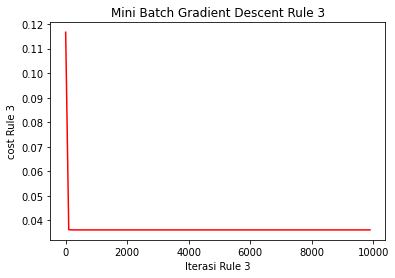

In [ ]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Mini Batch Gradient Descent Rule 3")
plt.plot(mb_iterasi_rule3_list,mb_cost_rule3_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule3

0.036095764178670345

In [ ]:
mb_b0_rule3

0.608310119332073

In [ ]:
mb_bpoly_rule3 #hasil untuk x1 dan x2

array([ 0.28126426,  0.20842212, -0.04153352])

###Regresi

In [ ]:
mb_regresi_rule3=pd.DataFrame([mb_bpoly_rule3], columns=['b1', 'b2', 'b3'])
mb_regresi_rule3

,b1,b2,b3
0,0.281264,0.208422,-0.041534


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule3 = mb_regresi_rule3.T

In [ ]:
y3_awal=np.dot(data,mb_bpoly_rule3)

In [ ]:
z3 = y3_awal + mb_b0_rule3
z3

array([[23.18707426],
       [17.67435161],
       [22.64226931],
       [19.71933505],
       [19.49053933],
       [19.5559671 ],
       [21.72425372],
       [26.87923588],
       [18.06585517],
       [19.03458032],
       [30.73954175],
       [26.50155053],
       [24.9021282 ],
       [18.54153043],
       [23.16812822],
       [13.5814756 ],
       [19.91395447],
       [18.87601843],
       [22.93950945],
       [15.63542232],
       [28.67822593],
       [22.15466645],
       [24.27955532],
       [22.87674766],
       [25.30670693],
       [33.72178603],
       [26.31108833],
       [22.81600044],
       [17.66971123],
       [20.0559108 ],
       [21.07834455],
       [21.41289358],
       [22.26626805],
       [28.92044748],
       [25.61912759],
       [15.71491519],
       [20.48304546],
       [18.70798121],
       [25.01765842],
       [18.54332787],
       [23.16471662],
       [24.72439595],
       [20.65595663],
       [14.55784018],
       [20.50301988],
       [21

In [ ]:
data2['z3'] = z3
data2

,BodyFat,z1,z2,z3
165,19.2,48.084568,6.316407,23.187074
6,19.2,34.546891,-2.167666,17.674352
111,28.0,34.876755,2.900490,22.642269
172,20.5,31.670799,-1.649470,19.719335
115,16.7,23.854803,-3.790004,19.490539
...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007
75,18.5,19.912452,0.918472,24.659854
113,21.3,25.402933,-2.762818,20.420066
118,25.8,35.773646,0.837618,22.109100


###Komposisi Aturan

In [ ]:
data_rule_3=rule_3.iloc[:,0:12]
data_rule_3

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
108,43,87.997,191.770,17.3,Paruhbaya,Berat,Tinggi,overweight,0.8,0.900000,0.440299,0.0
127,43,69.059,172.085,17.4,Paruhbaya,Berat,Tinggi,overweight,0.8,0.300000,0.271186,0.0
184,40,77.337,188.595,17.5,Paruhbaya,Berat,Tinggi,overweight,0.5,0.566667,0.643826,0.0
95,53,101.831,197.485,17.4,Paruhbaya,Berat,Tinggi,overweight,0.2,0.623288,0.033243,0.0
197,42,76.203,181.610,17.7,Paruhbaya,Berat,Tinggi,overweight,0.7,0.533333,0.881356,0.0
139,49,96.502,190.500,20.4,Paruhbaya,Berat,Tinggi,overweight,0.6,0.794521,0.508141,0.4
90,46,80.286,177.800,20.5,Paruhbaya,Berat,Tinggi,overweight,0.9,0.666667,0.610169,0.4
98,46,70.987,173.355,17.8,Paruhbaya,Berat,Tinggi,overweight,0.9,0.333333,0.338983,0.0
141,40,78.585,176.530,18.3,Paruhbaya,Berat,Tinggi,overweight,0.5,0.600000,0.542373,0.0
123,47,68.719,169.545,16.0,Paruhbaya,Berat,Tinggi,overweight,0.8,0.266667,0.067797,0.0


In [ ]:
data_rule_3['alpha_predikat']=data_rule_3[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_3

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
108,43,87.997,191.770,17.3,Paruhbaya,Berat,Tinggi,overweight,0.8,0.900000,0.440299,0.0,0.440299
127,43,69.059,172.085,17.4,Paruhbaya,Berat,Tinggi,overweight,0.8,0.300000,0.271186,0.0,0.271186
184,40,77.337,188.595,17.5,Paruhbaya,Berat,Tinggi,overweight,0.5,0.566667,0.643826,0.0,0.500000
95,53,101.831,197.485,17.4,Paruhbaya,Berat,Tinggi,overweight,0.2,0.623288,0.033243,0.0,0.033243
197,42,76.203,181.610,17.7,Paruhbaya,Berat,Tinggi,overweight,0.7,0.533333,0.881356,0.0,0.533333
139,49,96.502,190.500,20.4,Paruhbaya,Berat,Tinggi,overweight,0.6,0.794521,0.508141,0.4,0.508141
90,46,80.286,177.800,20.5,Paruhbaya,Berat,Tinggi,overweight,0.9,0.666667,0.610169,0.4,0.610169
98,46,70.987,173.355,17.8,Paruhbaya,Berat,Tinggi,overweight,0.9,0.333333,0.338983,0.0,0.333333
141,40,78.585,176.530,18.3,Paruhbaya,Berat,Tinggi,overweight,0.5,0.600000,0.542373,0.0,0.500000
123,47,68.719,169.545,16.0,Paruhbaya,Berat,Tinggi,overweight,0.8,0.266667,0.067797,0.0,0.067797


In [ ]:
print(data_rule_3.alpha_predikat)

108    0.440299
127    0.271186
184    0.500000
95     0.033243
197    0.533333
139    0.508141
90     0.610169
98     0.333333
141    0.500000
123    0.067797
212    0.533333
192    0.700000
173    0.100000
105    0.338983
110    0.338983
91     0.542373
107    0.300000
187    0.600000
129    0.466667
130    0.566667
116    0.666667
214    0.500000
188    0.600000
106    0.779512
179    0.400000
102    0.600000
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data3=min(data_rule_3.alpha_predikat)
alpha_predikat_data3

0.033242876526459214

##Rule 4

In [ ]:
rule_4 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda X2 Berat X3 Tinggi maka Y obesitas"]
index=rule_4.index
data_rule_4=rule_4.iloc[:,0:4]
data_rule_4

,Age,Weight,Height,BodyFat
29,29,72.915,175.260,8.8
168,35,103.532,176.530,34.3
5,24,95.368,189.865,20.9
150,26,69.059,175.260,9.4
12,32,81.873,176.530,20.8
154,27,90.832,186.690,21.0
2,22,69.853,168.275,25.3
152,27,66.224,183.515,10.1
164,34,99.223,182.880,27.3
11,27,97.976,193.040,7.8


In [ ]:
data_rule_4.to_csv('hasilrule4.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule4=pd.read_csv('hasilrule4.csv',sep=',')
df_rule4

,Unnamed: 0,Age,Weight,Height,BodyFat
0,29,29,72.915,175.260,8.8
1,168,35,103.532,176.530,34.3
2,5,24,95.368,189.865,20.9
3,150,26,69.059,175.260,9.4
4,12,32,81.873,176.530,20.8
5,154,27,90.832,186.690,21.0
6,2,22,69.853,168.275,25.3
7,152,27,66.224,183.515,10.1
8,164,34,99.223,182.880,27.3
9,11,27,97.976,193.040,7.8


In [ ]:
#df_rule4=df_rule4.drop(columns=['Unnamed: 0'])
#df_rule4

In [ ]:
from sklearn import preprocessing
sx4 = preprocessing.MinMaxScaler()
sy4 = preprocessing.MinMaxScaler()

scaled_X4 = sx4.fit_transform(data_rule_4.drop('BodyFat',axis='columns'))
scaled_y4 = sy4.fit_transform(data_rule_4['BodyFat'].values.reshape(rule_4.shape[0],1))

scaled_X4

array([[0.53846154, 0.17934491, 0.28205128],
       [1.        , 1.        , 0.33333333],
       [0.15384615, 0.78117294, 0.87179487],
       [0.30769231, 0.07598906, 0.28205128],
       [0.76923077, 0.41945427, 0.33333333],
       [0.38461538, 0.65959044, 0.74358974],
       [0.        , 0.09727136, 0.        ],
       [0.38461538, 0.        , 0.61538462],
       [0.92307692, 0.88450198, 0.58974359],
       [0.38461538, 0.85107752, 1.        ],
       [0.69230769, 0.02433794, 0.12820513],
       [0.15384615, 0.46504771, 0.51282051],
       [0.30769231, 0.4711322 , 0.61538462],
       [0.61538462, 0.72038169, 0.51282051],
       [0.76923077, 0.76900397, 0.48717949],
       [1.        , 0.24622065, 0.17948718],
       [0.69230769, 0.0638469 , 0.61538462],
       [0.46153846, 0.44379222, 0.61538462],
       [0.30769231, 0.93617991, 0.41025641],
       [1.        , 0.50761231, 0.33333333]])

In [ ]:
scaled_y4_reshape=scaled_y4.reshape(scaled_y4.shape[0],)
scaled_y4_reshape

array([0.03773585, 1.        , 0.49433962, 0.06037736, 0.49056604,
       0.49811321, 0.66037736, 0.08679245, 0.73584906, 0.        ,
       0.56981132, 0.78867925, 0.09811321, 0.50566038, 0.56981132,
       0.52830189, 0.06037736, 0.08301887, 0.65660377, 0.53962264])

In [ ]:
def mini_batch_gradient_descent_rule4(X4, y4, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule4 = X4.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule4 = np.ones(shape=(jumlah_variabel_rule4))       # b1, b2, ... b(jumlah variabel)
    b0_rule4 = 0                                         # b0 atau bias
    n = X4.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule4_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule4_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule4_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule4 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X4_smntr = X4[random_indices]
        y4_smntr = y4[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule4 = X4_smntr[j:j+batch_size]
            yj_rule4 = y4_smntr[j:j+batch_size]
            
            y4_pred = np.dot(bpoly_rule4, Xj_rule4.T) + b0_rule4           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule4_grad = -(2/len(Xj_rule4))*(Xj_rule4.T.dot(yj_rule4-y4_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule4_grad = -(2/len(Xj_rule4))*np.sum(yj_rule4-y4_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule4 = bpoly_rule4 - learning_rate * bpoly_rule4_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule4 = b0_rule4 - learning_rate * b0_rule4_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule4 in range(jumlah_variabel_rule4):
                bp_rule4=bpoly_rule4[jv_rule4]
                bp.append(bp_rule4)
            b_rule4=[b0_rule4]+bp
        
            cost_rule4 = np.mean(np.square(yj_rule4-y4_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule4_list.append(cost_rule4)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule4_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule4_list.append(b_rule4)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule4, b0_rule4, cost_rule4, b_rule4_list, cost_rule4_list, iterasi_rule4_list  # Output

In [ ]:
import time
mulai_rule4 = time.time()
mb_bpoly_rule4, mb_b0_rule4, mb_cost_rule4, mb_b_rule4_list, mb_cost_rule4_list, mb_iterasi_rule4_list=mini_batch_gradient_descent_rule4 (scaled_X4, 
                                                                                                                                        scaled_y4_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule4 = time.time()
waktu_komputasi_rule4 = (selesai_rule4 - mulai_rule4)
print("Waktu Komputasi Rule 4: ",waktu_komputasi_rule4)

Waktu Komputasi Rule 4:  3.569443702697754


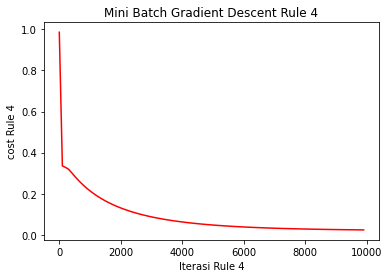

In [ ]:
plt.xlabel("Iterasi Rule 4")
plt.ylabel("cost Rule 4")
plt.title("Mini Batch Gradient Descent Rule 4")
plt.plot(mb_iterasi_rule4_list,mb_cost_rule4_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule4

0.023933986069806006

In [ ]:
mb_b0_rule4

0.41486908950431417

In [ ]:
mb_bpoly_rule4 #hasil untuk x1 dan x2

array([ 0.05625242,  0.63932837, -0.70047498])

###Regresi

In [ ]:
mb_regresi_rule4=pd.DataFrame([mb_bpoly_rule4], columns=['b1', 'b2', 'b3'])
mb_regresi_rule4

,b1,b2,b3
0,0.056252,0.639328,-0.700475


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule4 = mb_regresi_rule4.T

In [ ]:
y4_awal=np.dot(data,mb_bpoly_rule4)

In [ ]:
z4 = y4_awal + mb_b0_rule4
z4

array([[-65.90431898],
       [-69.73335797],
       [-68.56911412],
       [-72.53859176],
       [-74.72569437],
       [-75.2527984 ],
       [-67.74608987],
       [-67.25716465],
       [-71.5713949 ],
       [-76.22241411],
       [-63.78551607],
       [-66.5368476 ],
       [-68.7679648 ],
       [-73.65320468],
       [-74.73604224],
       [-85.48452023],
       [-74.67601464],
       [-67.84742225],
       [-74.60113082],
       [-74.68953726],
       [-69.44008737],
       [-67.09426306],
       [-72.9101327 ],
       [-68.40086584],
       [-60.23860411],
       [-56.04413809],
       [-61.88840646],
       [-75.00966631],
       [-76.66170838],
       [-66.61801455],
       [-72.40245719],
       [-73.03831221],
       [-67.77522693],
       [-70.25076336],
       [-66.17501521],
       [-79.09769118],
       [-71.68121267],
       [-65.26455844],
       [-66.45600909],
       [-74.72002924],
       [-78.82813185],
       [-70.13903431],
       [-61.10870869],
       [-80

In [ ]:
data2['z4'] = z4
data2

,BodyFat,z1,z2,z3,z4
165,19.2,48.084568,6.316407,23.187074,-65.904319
6,19.2,34.546891,-2.167666,17.674352,-69.733358
111,28.0,34.876755,2.900490,22.642269,-68.569114
172,20.5,31.670799,-1.649470,19.719335,-72.538592
115,16.7,23.854803,-3.790004,19.490539,-74.725694
...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451
75,18.5,19.912452,0.918472,24.659854,-73.258532
113,21.3,25.402933,-2.762818,20.420066,-74.943039
118,25.8,35.773646,0.837618,22.109100,-73.607458


###Komposisi Aturan

In [ ]:
data_rule_4=rule_4.iloc[:,0:12]
data_rule_4

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
29,29,72.915,175.260,8.8,Muda,Berat,Tinggi,obesitas,0.857143,0.400000,0.474576,0.000000
168,35,103.532,176.530,34.3,Muda,Berat,Tinggi,obesitas,0.000000,0.554795,0.542373,0.800000
5,24,95.368,189.865,20.9,Muda,Berat,Tinggi,obesitas,0.333333,0.828767,0.575984,0.000000
150,26,69.059,175.260,9.4,Muda,Berat,Tinggi,obesitas,0.666667,0.300000,0.474576,0.000000
12,32,81.873,176.530,20.8,Muda,Berat,Tinggi,obesitas,0.428571,0.700000,0.542373,0.000000
154,27,90.832,186.690,21.0,Muda,Berat,Tinggi,obesitas,0.833333,1.000000,0.779512,0.000000
2,22,69.853,168.275,25.3,Muda,Berat,Tinggi,obesitas,0.000000,0.300000,0.000000,0.000000
152,27,66.224,183.515,10.1,Muda,Berat,Tinggi,obesitas,0.833333,0.200000,0.983039,0.000000
164,34,99.223,182.880,27.3,Muda,Berat,Tinggi,obesitas,0.142857,0.691781,0.949153,0.177778
11,27,97.976,193.040,7.8,Muda,Berat,Tinggi,obesitas,0.833333,0.760274,0.304613,0.000000


In [ ]:
data_rule_4['alpha_predikat']=data_rule_4[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_4

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
29,29,72.915,175.260,8.8,Muda,Berat,Tinggi,obesitas,0.857143,0.400000,0.474576,0.000000,0.400000
168,35,103.532,176.530,34.3,Muda,Berat,Tinggi,obesitas,0.000000,0.554795,0.542373,0.800000,0.000000
5,24,95.368,189.865,20.9,Muda,Berat,Tinggi,obesitas,0.333333,0.828767,0.575984,0.000000,0.333333
150,26,69.059,175.260,9.4,Muda,Berat,Tinggi,obesitas,0.666667,0.300000,0.474576,0.000000,0.300000
12,32,81.873,176.530,20.8,Muda,Berat,Tinggi,obesitas,0.428571,0.700000,0.542373,0.000000,0.428571
154,27,90.832,186.690,21.0,Muda,Berat,Tinggi,obesitas,0.833333,1.000000,0.779512,0.000000,0.779512
2,22,69.853,168.275,25.3,Muda,Berat,Tinggi,obesitas,0.000000,0.300000,0.000000,0.000000,0.000000
152,27,66.224,183.515,10.1,Muda,Berat,Tinggi,obesitas,0.833333,0.200000,0.983039,0.000000,0.200000
164,34,99.223,182.880,27.3,Muda,Berat,Tinggi,obesitas,0.142857,0.691781,0.949153,0.177778,0.142857
11,27,97.976,193.040,7.8,Muda,Berat,Tinggi,obesitas,0.833333,0.760274,0.304613,0.000000,0.304613


In [ ]:
print(data_rule_4.alpha_predikat)

29     0.400000
168    0.000000
5      0.333333
150    0.300000
12     0.428571
154    0.779512
2      0.000000
152    0.200000
164    0.142857
11     0.304613
27     0.203390
4      0.333333
3      0.666667
13     0.714286
17     0.428571
166    0.000000
160    0.266667
157    0.733333
149    0.623288
14     0.000000
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data4=min(data_rule_4.alpha_predikat)
alpha_predikat_data4

0.0

##Rule 5

In [ ]:
rule_5 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda X2 Berat X3 Tinggi maka Y overweight"]
index=rule_5.index
data_rule_5=rule_5.iloc[:,0:4]
data_rule_5

,Age,Weight,Height,BodyFat
167,35,101.945,183.515,20.3
22,31,63.616,173.355,15.6
155,28,77.791,191.135,17.3
146,24,94.574,184.785,19.2
153,27,71.101,170.815,16.5
23,32,67.472,177.800,17.7
163,34,63.503,179.070,15.1
169,35,78.358,176.530,16.5
21,28,90.945,177.165,15.2
151,26,109.656,189.230,19.6


In [ ]:
data_rule_5.to_csv('hasilrule5.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule5=pd.read_csv('hasilrule5.csv',sep=',')
df_rule5

,Unnamed: 0,Age,Weight,Height,BodyFat
0,167,35,101.945,183.515,20.3
1,22,31,63.616,173.355,15.6
2,155,28,77.791,191.135,17.3
3,146,24,94.574,184.785,19.2
4,153,27,71.101,170.815,16.5
5,23,32,67.472,177.800,17.7
6,163,34,63.503,179.070,15.1
7,169,35,78.358,176.530,16.5
8,21,28,90.945,177.165,15.2
9,151,26,109.656,189.230,19.6


In [ ]:
df_rule5=df_rule5.drop(columns=['Unnamed: 0'])
df_rule5

,Age,Weight,Height,BodyFat
0,35,101.945,183.515,20.3
1,31,63.616,173.355,15.6
2,28,77.791,191.135,17.3
3,24,94.574,184.785,19.2
4,27,71.101,170.815,16.5
5,32,67.472,177.800,17.7
6,34,63.503,179.070,15.1
7,35,78.358,176.530,16.5
8,28,90.945,177.165,15.2
9,26,109.656,189.230,19.6


In [ ]:
from sklearn import preprocessing
sx5 = preprocessing.MinMaxScaler()
sy5 = preprocessing.MinMaxScaler()

scaled_X5 = sx5.fit_transform(data_rule_5.drop('BodyFat',axis='columns'))
scaled_y5 = sy5.fit_transform(data_rule_5['BodyFat'].values.reshape(rule_5.shape[0],1))

scaled_X5

array([[1.        , 0.83292527, 0.625     ],
       [0.63636364, 0.00244838, 0.125     ],
       [0.36363636, 0.30957901, 1.        ],
       [0.        , 0.67321734, 0.6875    ],
       [0.27272727, 0.16462635, 0.        ],
       [0.72727273, 0.08599658, 0.34375   ],
       [0.90909091, 0.        , 0.40625   ],
       [1.        , 0.32186423, 0.28125   ],
       [0.36363636, 0.59458757, 0.3125    ],
       [0.18181818, 1.        , 0.90625   ],
       [0.36363636, 0.38329036, 0.09375   ]])

In [ ]:
scaled_y5_reshape=scaled_y5.reshape(scaled_y5.shape[0],)
scaled_y5_reshape

array([1.        , 0.09615385, 0.42307692, 0.78846154, 0.26923077,
       0.5       , 0.        , 0.26923077, 0.01923077, 0.86538462,
       0.76923077])

In [ ]:
def mini_batch_gradient_descent_rule5(X5, y5, iterasi, batch_size = 5, learning_rate = 0.1):

    jumlah_variabel_rule5 = X5.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule5 = np.ones(shape=(jumlah_variabel_rule5))       # b1, b2, ... b(jumlah variabel)
    b0_rule5 = 0                                         # b0 atau bias
    n = X5.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule5_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule5_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule5_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule5 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X5_smntr = X5[random_indices]
        y5_smntr = y5[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule5 = X5_smntr[j:j+batch_size]
            yj_rule5 = y5_smntr[j:j+batch_size]
            
            y5_pred = np.dot(bpoly_rule5, Xj_rule5.T) + b0_rule5          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule5_grad = -(2/len(Xj_rule5))*(Xj_rule5.T.dot(yj_rule5-y5_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule5_grad = -(2/len(Xj_rule5))*np.sum(yj_rule5-y5_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule5 = bpoly_rule5 - learning_rate * bpoly_rule5_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule5 = b0_rule5 - learning_rate * b0_rule5_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule5 in range(jumlah_variabel_rule5):
                bp_rule5=bpoly_rule5[jv_rule5]
                bp.append(bp_rule5)
            b_rule5=[b0_rule5]+bp
        
            cost_rule5 = np.mean(np.square(yj_rule5-y5_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule5_list.append(cost_rule5)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule5_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule5_list.append(b_rule5)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule5, b0_rule5, cost_rule5, b_rule5_list, cost_rule5_list, iterasi_rule5_list  # Output

In [ ]:
import time
mulai_rule5 = time.time()
mb_bpoly_rule5, mb_b0_rule5, mb_cost_rule5, mb_b_rule5_list, mb_cost_rule5_list, mb_iterasi_rule5_list=mini_batch_gradient_descent_rule5 (scaled_X5, 
                                                                                                                                        scaled_y5_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule5 = time.time()
waktu_komputasi_rule5 = (selesai_rule5 - mulai_rule5)
print("Waktu Komputasi Rule 5: ",waktu_komputasi_rule5)

Waktu Komputasi Rule 5:  3.116135597229004


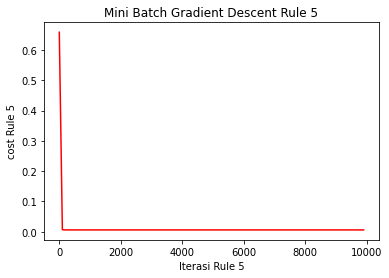

In [ ]:
plt.xlabel("Iterasi Rule 5")
plt.ylabel("cost Rule 5")
plt.title("Mini Batch Gradient Descent Rule 5")
plt.plot(mb_iterasi_rule5_list,mb_cost_rule5_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule5

0.005888036963819873

In [ ]:
mb_b0_rule5

0.06998480435475696

In [ ]:
mb_bpoly_rule5 #hasil untuk x1 dan x2

array([-0.04525043,  0.83377721,  0.04264061])

###Regresi

In [ ]:
mb_regresi_rule5=pd.DataFrame([mb_bpoly_rule5], columns=['b1', 'b2', 'b3'])
mb_regresi_rule5

,b1,b2,b3
0,-0.04525,0.833777,0.042641


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule5 = mb_regresi_rule5.T

In [ ]:
y5_awal=np.dot(data,mb_bpoly_rule5)

In [ ]:
z5 = y5_awal + mb_b0_rule5
z5

array([[ 88.54172845],
       [ 74.90100572],
       [ 75.01011176],
       [ 73.21088077],
       [ 65.51538234],
       [ 66.04228759],
       [ 70.01182714],
       [ 68.39583308],
       [ 81.96721543],
       [ 75.44126659],
       [ 86.88811225],
       [ 80.8431166 ],
       [ 69.07730069],
       [ 73.44603606],
       [ 63.8413224 ],
       [ 61.15660113],
       [ 64.7357856 ],
       [ 67.18559236],
       [ 71.40772793],
       [ 63.34290096],
       [ 63.75570376],
       [ 86.61992899],
       [ 73.25720018],
       [ 65.89897041],
       [ 88.5401835 ],
       [ 93.47373431],
       [ 94.28171759],
       [ 63.60308858],
       [ 77.40152197],
       [ 75.70493318],
       [ 72.79536121],
       [ 77.66780247],
       [ 68.40366725],
       [ 77.00494005],
       [ 79.12357103],
       [ 66.82008066],
       [ 69.4858294 ],
       [ 75.63444452],
       [ 84.93324993],
       [ 60.66546812],
       [ 63.85049563],
       [ 80.3813767 ],
       [ 84.09009119],
       [ 67

In [ ]:
data2['z5'] = z5
data2

,BodyFat,z1,z2,z3,z4,z5
165,19.2,48.084568,6.316407,23.187074,-65.904319,88.541728
6,19.2,34.546891,-2.167666,17.674352,-69.733358,74.901006
111,28.0,34.876755,2.900490,22.642269,-68.569114,75.010112
172,20.5,31.670799,-1.649470,19.719335,-72.538592,73.210881
115,16.7,23.854803,-3.790004,19.490539,-74.725694,65.515382
...,...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451,76.816075
75,18.5,19.912452,0.918472,24.659854,-73.258532,60.687789
113,21.3,25.402933,-2.762818,20.420066,-74.943039,67.423362
118,25.8,35.773646,0.837618,22.109100,-73.607458,78.509819


###Komposisi Aturan

In [ ]:
data_rule_5=rule_5.iloc[:,0:12]
data_rule_5

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
167,35,101.945,183.515,20.3,Muda,Berat,Tinggi,overweight,0.000000,0.623288,0.983039,0.4
22,31,63.616,173.355,15.6,Muda,Berat,Tinggi,overweight,0.571429,0.100000,0.338983,0.0
155,28,77.791,191.135,17.3,Muda,Berat,Tinggi,overweight,1.000000,0.566667,0.440299,0.0
146,24,94.574,184.785,19.2,Muda,Berat,Tinggi,overweight,0.333333,0.863014,0.915197,0.0
153,27,71.101,170.815,16.5,Muda,Berat,Tinggi,overweight,0.833333,0.366667,0.135593,0.0
23,32,67.472,177.800,17.7,Muda,Berat,Tinggi,overweight,0.428571,0.233333,0.610169,0.0
163,34,63.503,179.070,15.1,Muda,Berat,Tinggi,overweight,0.142857,0.100000,0.745763,0.0
169,35,78.358,176.530,16.5,Muda,Berat,Tinggi,overweight,0.000000,0.600000,0.542373,0.0
21,28,90.945,177.165,15.2,Muda,Berat,Tinggi,overweight,1.000000,1.000000,0.610169,0.0
151,26,109.656,189.230,19.6,Muda,Berat,Tinggi,overweight,0.666667,0.349315,0.575984,0.0


In [ ]:
data_rule_5['alpha_predikat']=data_rule_5[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_5

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
167,35,101.945,183.515,20.3,Muda,Berat,Tinggi,overweight,0.000000,0.623288,0.983039,0.4,0.000000
22,31,63.616,173.355,15.6,Muda,Berat,Tinggi,overweight,0.571429,0.100000,0.338983,0.0,0.100000
155,28,77.791,191.135,17.3,Muda,Berat,Tinggi,overweight,1.000000,0.566667,0.440299,0.0,0.440299
146,24,94.574,184.785,19.2,Muda,Berat,Tinggi,overweight,0.333333,0.863014,0.915197,0.0,0.333333
153,27,71.101,170.815,16.5,Muda,Berat,Tinggi,overweight,0.833333,0.366667,0.135593,0.0,0.135593
23,32,67.472,177.800,17.7,Muda,Berat,Tinggi,overweight,0.428571,0.233333,0.610169,0.0,0.233333
163,34,63.503,179.070,15.1,Muda,Berat,Tinggi,overweight,0.142857,0.100000,0.745763,0.0,0.100000
169,35,78.358,176.530,16.5,Muda,Berat,Tinggi,overweight,0.000000,0.600000,0.542373,0.0,0.000000
21,28,90.945,177.165,15.2,Muda,Berat,Tinggi,overweight,1.000000,1.000000,0.610169,0.0,0.610169
151,26,109.656,189.230,19.6,Muda,Berat,Tinggi,overweight,0.666667,0.349315,0.575984,0.0,0.349315


In [ ]:
print(data_rule_5.alpha_predikat)

167    0.000000
22     0.100000
155    0.440299
146    0.333333
153    0.135593
23     0.233333
163    0.100000
169    0.000000
21     0.610169
151    0.349315
20     0.271186
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data5=min(data_rule_5.alpha_predikat)
alpha_predikat_data5

0.0

##Rule 6

In [ ]:
rule_6 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y normal"]
index=rule_6.index
data_rule_6=rule_6.iloc[:,0:4]
data_rule_6

,Age,Weight,Height,BodyFat
176,37,68.492,170.180,13.1
190,41,69.400,175.895,11.4
46,40,60.555,171.450,10.8
200,43,80.853,178.435,12.2
122,40,72.688,174.625,14.7
224,55,81.533,174.625,10.9
89,48,79.832,185.420,14.1
222,54,73.369,171.450,11.5
209,47,72.461,179.705,10.8
48,45,61.575,173.990,13.6


In [ ]:
data_rule_6.to_csv('hasilrule6.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule6=pd.read_csv('hasilrule6.csv',sep=',')
df_rule6

,Unnamed: 0,Age,Weight,Height,BodyFat
0,176,37,68.492,170.180,13.1
1,190,41,69.400,175.895,11.4
2,46,40,60.555,171.450,10.8
3,200,43,80.853,178.435,12.2
4,122,40,72.688,174.625,14.7
5,224,55,81.533,174.625,10.9
6,89,48,79.832,185.420,14.1
7,222,54,73.369,171.450,11.5
8,209,47,72.461,179.705,10.8
9,48,45,61.575,173.990,13.6


In [ ]:
df_rule6=df_rule6.drop(columns=['Unnamed: 0'])
df_rule6

,Age,Weight,Height,BodyFat
0,37,68.492,170.180,13.1
1,41,69.400,175.895,11.4
2,40,60.555,171.450,10.8
3,43,80.853,178.435,12.2
4,40,72.688,174.625,14.7
5,55,81.533,174.625,10.9
6,48,79.832,185.420,14.1
7,54,73.369,171.450,11.5
8,47,72.461,179.705,10.8
9,45,61.575,173.990,13.6


In [ ]:
from sklearn import preprocessing
sx6 = preprocessing.MinMaxScaler()
sy6 = preprocessing.MinMaxScaler()

scaled_X6 = sx6.fit_transform(data_rule_6.drop('BodyFat',axis='columns'))
scaled_y6 = sy6.fit_transform(data_rule_6['BodyFat'].values.reshape(rule_6.shape[0],1))

scaled_X6

array([[0.        , 0.37834875, 0.        ],
       [0.22222222, 0.42163219, 0.375     ],
       [0.16666667, 0.        , 0.08333333],
       [0.33333333, 0.96758509, 0.54166667],
       [0.16666667, 0.57836781, 0.29166667],
       [1.        , 1.        , 0.29166667],
       [0.61111111, 0.91891505, 1.        ],
       [0.94444444, 0.61083039, 0.08333333],
       [0.55555556, 0.56754695, 0.625     ],
       [0.44444444, 0.04862237, 0.25      ]])

In [ ]:
scaled_y6_reshape=scaled_y6.reshape(scaled_y6.shape[0],)
scaled_y6_reshape

array([0.58974359, 0.15384615, 0.        , 0.35897436, 1.        ,
       0.02564103, 0.84615385, 0.17948718, 0.        , 0.71794872])

In [ ]:
def mini_batch_gradient_descent_rule6(X6, y6, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule6 = X6.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule6 = np.ones(shape=(jumlah_variabel_rule6))       # b1, b2, ... b(jumlah variabel)
    b0_rule6 = 0                                         # b0 atau bias
    n = X6.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule6_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule6_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule6_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule6 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X6_smntr = X6[random_indices]
        y6_smntr = y6[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule6 = X6_smntr[j:j+batch_size]
            yj_rule6 = y6_smntr[j:j+batch_size]
            
            y6_pred = np.dot(bpoly_rule6, Xj_rule6.T) + b0_rule6          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule6_grad = -(2/len(Xj_rule6))*(Xj_rule6.T.dot(yj_rule6-y6_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule6_grad = -(2/len(Xj_rule6))*np.sum(yj_rule6-y6_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule6 = bpoly_rule6 - learning_rate * bpoly_rule6_grad        # Memperbaharui bpoly(bobot) setiap iterasi 
            b0_rule6 = b0_rule6 - learning_rate * b0_rule6_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule6 in range(jumlah_variabel_rule6):
                bp_rule6=bpoly_rule6[jv_rule6]
                bp.append(bp_rule6)
            b_rule6=[b0_rule6]+bp
        
            cost_rule6 = np.mean(np.square(yj_rule6-y6_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule6_list.append(cost_rule6)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule6_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule6_list.append(b_rule6)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule6, b0_rule6, cost_rule6, b_rule6_list, cost_rule6_list, iterasi_rule6_list  # Output

In [ ]:
import time
mulai_rule6 = time.time()
mb_bpoly_rule6, mb_b0_rule6, mb_cost_rule6, mb_b_rule6_list, mb_cost_rule6_list, mb_iterasi_rule6_list=mini_batch_gradient_descent_rule6 (scaled_X6, 
                                                                                                                                        scaled_y6_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule6 = time.time()
waktu_komputasi_rule6 = (selesai_rule6 - mulai_rule6)
print("Waktu Komputasi Rule 6: ",waktu_komputasi_rule6)

Waktu Komputasi Rule 6:  3.00716233253479


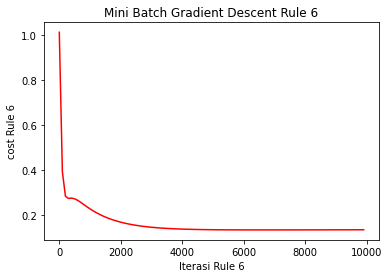

In [ ]:
plt.xlabel("Iterasi Rule 6")
plt.ylabel("cost Rule 6")
plt.title("Mini Batch Gradient Descent Rule 6")
plt.plot(mb_iterasi_rule6_list,mb_cost_rule6_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule6

0.13451472400212666

In [ ]:
mb_b0_rule6

0.414000286021259

In [ ]:
mb_bpoly_rule6 #hasil untuk x1 dan x2

array([-0.42012114,  0.0598202 ,  0.35519744])

###Regresi

In [ ]:
mb_regresi_rule6=pd.DataFrame([mb_bpoly_rule6], columns=['b1', 'b2', 'b3'])
mb_regresi_rule6

,b1,b2,b3
0,-0.420121,0.05982,0.355197


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule6 = mb_regresi_rule6.T

In [ ]:
y6_awal=np.dot(data,mb_bpoly_rule6)

In [ ]:
z6 = y6_awal + mb_b0_rule6
z6

array([[58.1351637 ],
       [57.3306439 ],
       [50.4752114 ],
       [54.5755514 ],
       [50.37380295],
       [50.85882176],
       [47.88052712],
       [39.84396863],
       [62.44235599],
       [58.44588147],
       [46.31369376],
       [48.70708899],
       [43.48180657],
       [56.7071367 ],
       [44.41745146],
       [59.22109711],
       [49.26051307],
       [49.67110645],
       [49.9212435 ],
       [53.87878487],
       [35.11870412],
       [58.60742371],
       [48.80331198],
       [43.77289293],
       [53.17412031],
       [44.00064893],
       [56.49295296],
       [44.81723372],
       [61.75859275],
       [53.57576942],
       [52.46136654],
       [55.65716353],
       [46.0673088 ],
       [44.32365083],
       [48.52303673],
       [57.89924914],
       [50.65866673],
       [54.76065422],
       [53.45357518],
       [48.23697911],
       [46.01370452],
       [52.09998032],
       [56.48535186],
       [60.26990418],
       [52.891776  ],
       [52

In [ ]:
data2['z6'] = z6
data2

,BodyFat,z1,z2,z3,z4,z5,z6
165,19.2,48.084568,6.316407,23.187074,-65.904319,88.541728,58.135164
6,19.2,34.546891,-2.167666,17.674352,-69.733358,74.901006,57.330644
111,28.0,34.876755,2.900490,22.642269,-68.569114,75.010112,50.475211
172,20.5,31.670799,-1.649470,19.719335,-72.538592,73.210881,54.575551
115,16.7,23.854803,-3.790004,19.490539,-74.725694,65.515382,50.373803
...,...,...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451,76.816075,52.200377
75,18.5,19.912452,0.918472,24.659854,-73.258532,60.687789,39.707822
113,21.3,25.402933,-2.762818,20.420066,-74.943039,67.423362,50.571375
118,25.8,35.773646,0.837618,22.109100,-73.607458,78.509819,55.554649


###Komposisi Aturan

In [ ]:
data_rule_6=rule_6.iloc[:,0:12]
data_rule_6

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
176,37,68.492,170.180,13.1,Paruhbaya,Berat,Tinggi,normal,0.2,0.266667,0.135593,0.0
190,41,69.400,175.895,11.4,Paruhbaya,Berat,Tinggi,normal,0.6,0.300000,0.474576,0.0
46,40,60.555,171.450,10.8,Paruhbaya,Berat,Tinggi,normal,0.5,0.000000,0.203390,0.0
200,43,80.853,178.435,12.2,Paruhbaya,Berat,Tinggi,normal,0.8,0.666667,0.677966,0.0
122,40,72.688,174.625,14.7,Paruhbaya,Berat,Tinggi,normal,0.5,0.400000,0.406780,0.0
224,55,81.533,174.625,10.9,Paruhbaya,Berat,Tinggi,normal,0.0,0.700000,0.406780,0.0
89,48,79.832,185.420,14.1,Paruhbaya,Berat,Tinggi,normal,0.7,0.633333,0.847354,0.0
222,54,73.369,171.450,11.5,Paruhbaya,Berat,Tinggi,normal,0.1,0.433333,0.203390,0.0
209,47,72.461,179.705,10.8,Paruhbaya,Berat,Tinggi,normal,0.8,0.400000,0.745763,0.0
48,45,61.575,173.990,13.6,Paruhbaya,Berat,Tinggi,normal,1.0,0.033333,0.338983,0.0


In [ ]:
data_rule_6['alpha_predikat']=data_rule_6[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_6

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
176,37,68.492,170.180,13.1,Paruhbaya,Berat,Tinggi,normal,0.2,0.266667,0.135593,0.0,0.135593
190,41,69.400,175.895,11.4,Paruhbaya,Berat,Tinggi,normal,0.6,0.300000,0.474576,0.0,0.300000
46,40,60.555,171.450,10.8,Paruhbaya,Berat,Tinggi,normal,0.5,0.000000,0.203390,0.0,0.000000
200,43,80.853,178.435,12.2,Paruhbaya,Berat,Tinggi,normal,0.8,0.666667,0.677966,0.0,0.666667
122,40,72.688,174.625,14.7,Paruhbaya,Berat,Tinggi,normal,0.5,0.400000,0.406780,0.0,0.400000
224,55,81.533,174.625,10.9,Paruhbaya,Berat,Tinggi,normal,0.0,0.700000,0.406780,0.0,0.000000
89,48,79.832,185.420,14.1,Paruhbaya,Berat,Tinggi,normal,0.7,0.633333,0.847354,0.0,0.633333
222,54,73.369,171.450,11.5,Paruhbaya,Berat,Tinggi,normal,0.1,0.433333,0.203390,0.0,0.100000
209,47,72.461,179.705,10.8,Paruhbaya,Berat,Tinggi,normal,0.8,0.400000,0.745763,0.0,0.400000
48,45,61.575,173.990,13.6,Paruhbaya,Berat,Tinggi,normal,1.0,0.033333,0.338983,0.0,0.033333


In [ ]:
print(data_rule_6.alpha_predikat)

176    0.135593
190    0.300000
46     0.000000
200    0.666667
122    0.400000
224    0.000000
89     0.633333
222    0.100000
209    0.400000
48     0.033333
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data6=min(data_rule_6.alpha_predikat)
alpha_predikat_data6

0.0

##Rule 7

In [ ]:
rule_7 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Berat X3 Tinggi maka Y atletik"]
index=rule_7.index
data_rule_7=rule_7.iloc[:,0:4]
data_rule_7

,Age,Weight,Height,BodyFat
51,40,63.163,175.260,6.6
47,39,67.358,180.975,5.6
53,49,69.286,186.690,6.3
54,42,61.802,171.450,3.9
223,55,64.523,170.815,5.2
203,44,83.461,187.960,6.0


In [ ]:
data_rule_7.to_csv('hasilrule7.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule7=pd.read_csv('hasilrule7.csv',sep=',')
df_rule7

,Unnamed: 0,Age,Weight,Height,BodyFat
0,51,40,63.163,175.260,6.6
1,47,39,67.358,180.975,5.6
2,53,49,69.286,186.690,6.3
3,54,42,61.802,171.450,3.9
4,223,55,64.523,170.815,5.2
5,203,44,83.461,187.960,6.0


In [ ]:
df_rule7=df_rule7.drop(columns=['Unnamed: 0'])
df_rule7

,Age,Weight,Height,BodyFat
0,40,63.163,175.260,6.6
1,39,67.358,180.975,5.6
2,49,69.286,186.690,6.3
3,42,61.802,171.450,3.9
4,55,64.523,170.815,5.2
5,44,83.461,187.960,6.0


In [ ]:
from sklearn import preprocessing
sx7 = preprocessing.MinMaxScaler()
sy7 = preprocessing.MinMaxScaler()

scaled_X7 = sx7.fit_transform(data_rule_7.drop('BodyFat',axis='columns'))
scaled_y7 = sy7.fit_transform(data_rule_7['BodyFat'].values.reshape(rule_7.shape[0],1))

scaled_X7

array([[0.0625    , 0.06283762, 0.25925926],
       [0.        , 0.25652154, 0.59259259],
       [0.625     , 0.34553765, 0.92592593],
       [0.1875    , 0.        , 0.03703704],
       [1.        , 0.12562907, 0.        ],
       [0.3125    , 1.        , 1.        ]])

In [ ]:
scaled_y7_reshape=scaled_y7.reshape(scaled_y7.shape[0],)
scaled_y7_reshape

array([1.        , 0.62962963, 0.88888889, 0.        , 0.48148148,
       0.77777778])

In [ ]:
def mini_batch_gradient_descent_rule7(X7, y7, iterasi, batch_size = 5, learning_rate = 0.001):

    jumlah_variabel_rule7 = X7.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule7 = np.ones(shape=(jumlah_variabel_rule7))       # b1, b2, ... b(jumlah variabel)
    b0_rule7 = 0                                         # b0 atau bias
    n = X7.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule7_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule7_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule7_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule7 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X7_smntr = X7[random_indices]
        y7_smntr = y7[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule7 = X7_smntr[j:j+batch_size]
            yj_rule7 = y7_smntr[j:j+batch_size]
            
            y7_pred = np.dot(bpoly_rule7, Xj_rule7.T) + b0_rule7          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule7_grad = -(2/len(Xj_rule7))*(Xj_rule7.T.dot(yj_rule7-y7_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule7_grad = -(2/len(Xj_rule7))*np.sum(yj_rule7-y7_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule7 = bpoly_rule7 - learning_rate * bpoly_rule7_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule7 = b0_rule7 - learning_rate * b0_rule7_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule7 in range(jumlah_variabel_rule7):
                bp_rule7=bpoly_rule7[jv_rule7]
                bp.append(bp_rule7)
            b_rule7=[b0_rule7]+bp
        
            cost_rule7 = np.mean(np.square(yj_rule7-y7_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule7_list.append(cost_rule7)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule7_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule7_list.append(b_rule7)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule7, b0_rule7, cost_rule7, b_rule7_list, cost_rule7_list, iterasi_rule7_list  # Output

In [ ]:
import time
mulai_rule7 = time.time()
mb_bpoly_rule7, mb_b0_rule7, mb_cost_rule7, mb_b_rule7_list, mb_cost_rule7_list, mb_iterasi_rule7_list=mini_batch_gradient_descent_rule7 (scaled_X7, 
                                                                                                                                        scaled_y7_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.001)
selesai_rule7 = time.time()
waktu_komputasi_rule7 = (selesai_rule7 - mulai_rule7)
print("Waktu Komputasi Rule 7: ",waktu_komputasi_rule7)

Waktu Komputasi Rule 7:  2.811596632003784


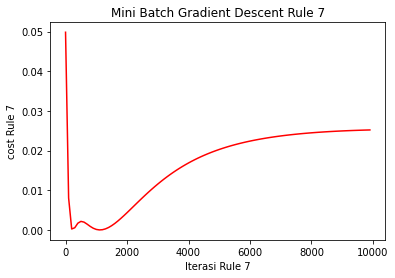

In [ ]:
plt.xlabel("Iterasi Rule 7")
plt.ylabel("cost Rule 7")
plt.title("Mini Batch Gradient Descent Rule 7")
plt.plot(mb_iterasi_rule7_list,mb_cost_rule7_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule7

0.025228901997422823

In [ ]:
mb_b0_rule7

0.08764241179559001

In [ ]:
mb_bpoly_rule7

array([0.24226137, 0.08339429, 0.68689052])

###Regresi

In [ ]:
mb_regresi_rule7=pd.DataFrame([mb_bpoly_rule7], columns=['b1', 'b2', 'b3'])
mb_regresi_rule7

,b1,b2,b3
0,0.242261,0.083394,0.686891


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule7 = mb_regresi_rule7.T

In [ ]:
y7_awal=np.dot(data,mb_bpoly_rule7)

In [ ]:
z7 = y7_awal + mb_b0_rule7
z7

array([[145.44697496],
       [134.92606944],
       [139.56583385],
       [139.14544552],
       [136.57540843],
       [137.49504396],
       [134.73123337],
       [139.25856086],
       [141.39447791],
       [143.39630642],
       [151.07790348],
       [145.40460699],
       [138.89961175],
       [139.04875099],
       [139.86299159],
       [138.07270838],
       [136.55754063],
       [129.87345159],
       [143.90719857],
       [130.79586571],
       [140.82886159],
       [144.32771492],
       [144.83254451],
       [134.3135081 ],
       [142.15940441],
       [150.55640953],
       [148.3687464 ],
       [139.59237615],
       [143.41204882],
       [135.00012031],
       [140.33782189],
       [144.23279363],
       [134.44381284],
       [149.7160299 ],
       [143.00517456],
       [137.39887448],
       [136.97253206],
       [132.0252644 ],
       [146.00673943],
       [132.62258247],
       [144.0119018 ],
       [146.72529084],
       [135.03833348],
       [137

In [ ]:
data2['z7'] = z7
data2

,BodyFat,z1,z2,z3,z4,z5,z6,z7
165,19.2,48.084568,6.316407,23.187074,-65.904319,88.541728,58.135164,145.446975
6,19.2,34.546891,-2.167666,17.674352,-69.733358,74.901006,57.330644,134.926069
111,28.0,34.876755,2.900490,22.642269,-68.569114,75.010112,50.475211,139.565834
172,20.5,31.670799,-1.649470,19.719335,-72.538592,73.210881,54.575551,139.145446
115,16.7,23.854803,-3.790004,19.490539,-74.725694,65.515382,50.373803,136.575408
...,...,...,...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451,76.816075,52.200377,143.894459
75,18.5,19.912452,0.918472,24.659854,-73.258532,60.687789,39.707822,138.240816
113,21.3,25.402933,-2.762818,20.420066,-74.943039,67.423362,50.571375,138.993688
118,25.8,35.773646,0.837618,22.109100,-73.607458,78.509819,55.554649,146.110988


###Komposisi Aturan

In [ ]:
data_rule_7=rule_7.iloc[:,0:12]
data_rule_7

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
51,40,63.163,175.260,6.6,Paruhbaya,Berat,Tinggi,atletik,0.5,0.100000,0.474576,0.0
47,39,67.358,180.975,5.6,Paruhbaya,Berat,Tinggi,atletik,0.4,0.233333,0.813559,0.0
53,49,69.286,186.690,6.3,Paruhbaya,Berat,Tinggi,atletik,0.6,0.300000,0.779512,0.0
54,42,61.802,171.450,3.9,Paruhbaya,Berat,Tinggi,atletik,0.7,0.033333,0.203390,0.0
223,55,64.523,170.815,5.2,Paruhbaya,Berat,Tinggi,atletik,0.0,0.133333,0.135593,0.0
203,44,83.461,187.960,6.0,Paruhbaya,Berat,Tinggi,atletik,0.9,0.766667,0.711669,0.0


In [ ]:
data_rule_7['alpha_predikat']=data_rule_7[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_7

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
51,40,63.163,175.260,6.6,Paruhbaya,Berat,Tinggi,atletik,0.5,0.100000,0.474576,0.0,0.100000
47,39,67.358,180.975,5.6,Paruhbaya,Berat,Tinggi,atletik,0.4,0.233333,0.813559,0.0,0.233333
53,49,69.286,186.690,6.3,Paruhbaya,Berat,Tinggi,atletik,0.6,0.300000,0.779512,0.0,0.300000
54,42,61.802,171.450,3.9,Paruhbaya,Berat,Tinggi,atletik,0.7,0.033333,0.203390,0.0,0.033333
223,55,64.523,170.815,5.2,Paruhbaya,Berat,Tinggi,atletik,0.0,0.133333,0.135593,0.0,0.000000
203,44,83.461,187.960,6.0,Paruhbaya,Berat,Tinggi,atletik,0.9,0.766667,0.711669,0.0,0.711669


In [ ]:
print(data_rule_7.alpha_predikat)

51     0.100000
47     0.233333
53     0.300000
54     0.033333
223    0.000000
203    0.711669
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data7=min(data_rule_7.alpha_predikat)
alpha_predikat_data7

0.0

##Rule 8

In [ ]:
rule_8 = df_fuzz[df_fuzz['Rule']=="Jika X1 Tua X2 Berat X3 Tinggi maka Y overweight"]
index=rule_8.index
data_rule_8=rule_8.iloc[:,0:4]
data_rule_8

,Age,Weight,Height,BodyFat
56,58,82.327,172.720,20.4
231,57,82.667,182.245,16.1
245,68,70.534,175.895,15.2
228,56,79.152,176.530,14.9
229,56,76.090,173.990,17.0
232,58,79.605,181.610,15.4


In [ ]:
data_rule_8.to_csv('hasilrule8.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule8=pd.read_csv('hasilrule8.csv',sep=',')
df_rule8

,Unnamed: 0,Age,Weight,Height,BodyFat
0,56,58,82.327,172.720,20.4
1,231,57,82.667,182.245,16.1
2,245,68,70.534,175.895,15.2
3,228,56,79.152,176.530,14.9
4,229,56,76.090,173.990,17.0
5,232,58,79.605,181.610,15.4


In [ ]:
df_rule8=df_rule8.drop(columns=['Unnamed: 0'])
df_rule8

,Age,Weight,Height,BodyFat
0,58,82.327,172.720,20.4
1,57,82.667,182.245,16.1
2,68,70.534,175.895,15.2
3,56,79.152,176.530,14.9
4,56,76.090,173.990,17.0
5,58,79.605,181.610,15.4


In [ ]:
from sklearn import preprocessing
sx8 = preprocessing.MinMaxScaler()
sy8 = preprocessing.MinMaxScaler()

scaled_X8 = sx8.fit_transform(data_rule_8.drop('BodyFat',axis='columns'))
scaled_y8 = sy8.fit_transform(data_rule_8['BodyFat'].values.reshape(rule_8.shape[0],1))

scaled_X8

array([[0.16666667, 0.97197725, 0.        ],
       [0.08333333, 1.        , 1.        ],
       [1.        , 0.        , 0.33333333],
       [0.        , 0.71029424, 0.4       ],
       [0.        , 0.45792467, 0.13333333],
       [0.16666667, 0.74763043, 0.93333333]])

In [ ]:
scaled_y8_reshape=scaled_y8.reshape(scaled_y8.shape[0],)
scaled_y8_reshape

array([1.        , 0.21818182, 0.05454545, 0.        , 0.38181818,
       0.09090909])

In [ ]:
def mini_batch_gradient_descent_rule8(X8, y8, iterasi, batch_size = 3, learning_rate = 0.4):

    jumlah_variabel_rule8 = X8.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule8 = np.ones(shape=(jumlah_variabel_rule8))       # b1, b2, ... b(jumlah variabel)
    b0_rule8 = 0                                         # b0 atau bias
    n = X8.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule8_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule8_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule8_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule8 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X8_smntr = X8[random_indices]
        y8_smntr = y8[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule8 = X8_smntr[j:j+batch_size]
            yj_rule8 = y8_smntr[j:j+batch_size]
            
            y8_pred = np.dot(bpoly_rule8, Xj_rule8.T) + b0_rule8          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule8_grad = -(2/len(Xj_rule8))*(Xj_rule8.T.dot(yj_rule8-y8_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule8_grad = -(2/len(Xj_rule8))*np.sum(yj_rule8-y8_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule8 = bpoly_rule8 - learning_rate * bpoly_rule8_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule8 = b0_rule8 - learning_rate * b0_rule8_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule8 in range(jumlah_variabel_rule8):
                bp_rule8=bpoly_rule8[jv_rule8]
                bp.append(bp_rule8)
            b_rule8=[b0_rule8]+bp
        
            cost_rule8 = np.mean(np.square(yj_rule8-y8_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule8_list.append(cost_rule8)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule8_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule8_list.append(b_rule8)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule8, b0_rule8, cost_rule8, b_rule8_list, cost_rule8_list, iterasi_rule8_list  # Output

In [ ]:
import time
mulai_rule8 = time.time()
mb_bpoly_rule8, mb_b0_rule8, mb_cost_rule8, mb_b_rule8_list, mb_cost_rule8_list, mb_iterasi_rule8_list=mini_batch_gradient_descent_rule8 (scaled_X8, 
                                                                                                                                        scaled_y8_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.4)
selesai_rule8 = time.time()
waktu_komputasi_rule8 = (selesai_rule8 - mulai_rule8)
print("Waktu Komputasi Rule 8: ",waktu_komputasi_rule8)

Waktu Komputasi Rule 8:  3.0011518001556396


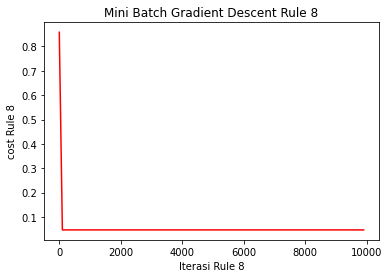

In [ ]:
plt.xlabel("Iterasi Rule 8")
plt.ylabel("cost Rule 8")
plt.title("Mini Batch Gradient Descent Rule 8")
plt.plot(mb_iterasi_rule8_list,mb_cost_rule8_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule8

0.04698312485417989

In [ ]:
mb_b0_rule8

-0.3180839145147698

In [ ]:
mb_bpoly_rule8

array([ 0.57970147,  1.19956888, -0.73460395])

###Regresi

In [ ]:
mb_regresi_rule8=pd.DataFrame([mb_bpoly_rule8], columns=['b1', 'b2', 'b3'])
mb_regresi_rule8

,b1,b2,b3
0,0.579701,1.199569,-0.734604


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule8 = mb_regresi_rule8.T

In [ ]:
y8_awal=np.dot(data,mb_bpoly_rule8)

In [ ]:
z8 = y8_awal + mb_b0_rule8
z8

array([[  0.43414711],
       [-16.90735012],
       [ -6.29413886],
       [-16.06287112],
       [-20.37248506],
       [-20.62527653],
       [ -8.43095929],
       [  1.49535963],
       [-16.25693071],
       [-20.34811319],
       [ 16.47562906],
       [  4.36313112],
       [ -3.55411776],
       [-19.31462401],
       [-13.75372647],
       [-42.88617591],
       [-19.69906631],
       [-14.62296543],
       [-12.29636188],
       [-28.20314152],
       [  1.77299913],
       [ -3.11495581],
       [ -7.70108398],
       [ -7.81284812],
       [  9.86047092],
       [ 31.05683362],
       [ 11.55032851],
       [-14.74128136],
       [-22.91297374],
       [ -9.21538129],
       [-13.43666591],
       [-12.26507704],
       [ -7.79937453],
       [  4.55701455],
       [  2.62130214],
       [-31.42671018],
       [-14.66013808],
       [-10.51909716],
       [  2.56209411],
       [-23.30670123],
       [-17.64458872],
       [ -2.55777753],
       [ -0.8809669 ],
       [-34

In [ ]:
data2['z8'] = z8
data2

,BodyFat,z1,z2,z3,z4,z5,z6,z7,z8
165,19.2,48.084568,6.316407,23.187074,-65.904319,88.541728,58.135164,145.446975,0.434147
6,19.2,34.546891,-2.167666,17.674352,-69.733358,74.901006,57.330644,134.926069,-16.907350
111,28.0,34.876755,2.900490,22.642269,-68.569114,75.010112,50.475211,139.565834,-6.294139
172,20.5,31.670799,-1.649470,19.719335,-72.538592,73.210881,54.575551,139.145446,-16.062871
115,16.7,23.854803,-3.790004,19.490539,-74.725694,65.515382,50.373803,136.575408,-20.372485
...,...,...,...,...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451,76.816075,52.200377,143.894459,-7.599930
75,18.5,19.912452,0.918472,24.659854,-73.258532,60.687789,39.707822,138.240816,-10.239133
113,21.3,25.402933,-2.762818,20.420066,-74.943039,67.423362,50.571375,138.993688,-18.359554
118,25.8,35.773646,0.837618,22.109100,-73.607458,78.509819,55.554649,146.110988,-11.280335


###Komposisi Aturan

In [ ]:
data_rule_8=rule_8.iloc[:,0:12]
data_rule_8

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
56,58,82.327,172.720,20.4,Tua,Berat,Tinggi,overweight,0.230769,0.733333,0.271186,0.4
231,57,82.667,182.245,16.1,Tua,Berat,Tinggi,overweight,0.153846,0.733333,0.949153,0.0
245,68,70.534,175.895,15.2,Tua,Berat,Tinggi,overweight,1.000000,0.333333,0.474576,0.0
228,56,79.152,176.530,14.9,Tua,Berat,Tinggi,overweight,0.076923,0.633333,0.542373,0.0
229,56,76.090,173.990,17.0,Tua,Berat,Tinggi,overweight,0.076923,0.533333,0.338983,0.0
232,58,79.605,181.610,15.4,Tua,Berat,Tinggi,overweight,0.230769,0.633333,0.881356,0.0


In [ ]:
data_rule_8['alpha_predikat']=data_rule_8[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_8

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
56,58,82.327,172.720,20.4,Tua,Berat,Tinggi,overweight,0.230769,0.733333,0.271186,0.4,0.230769
231,57,82.667,182.245,16.1,Tua,Berat,Tinggi,overweight,0.153846,0.733333,0.949153,0.0,0.153846
245,68,70.534,175.895,15.2,Tua,Berat,Tinggi,overweight,1.000000,0.333333,0.474576,0.0,0.333333
228,56,79.152,176.530,14.9,Tua,Berat,Tinggi,overweight,0.076923,0.633333,0.542373,0.0,0.076923
229,56,76.090,173.990,17.0,Tua,Berat,Tinggi,overweight,0.076923,0.533333,0.338983,0.0,0.076923
232,58,79.605,181.610,15.4,Tua,Berat,Tinggi,overweight,0.230769,0.633333,0.881356,0.0,0.230769


In [ ]:
print(data_rule_8.alpha_predikat)

56     0.230769
231    0.153846
245    0.333333
228    0.076923
229    0.076923
232    0.230769
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data8=min(data_rule_8.alpha_predikat)
alpha_predikat_data8

0.07692307692307693

##Rule 9

In [ ]:
rule_9 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda X2 Berat X3 Tinggi maka Y normal"]
index=rule_9.index
data_rule_9=rule_9.iloc[:,0:4]
data_rule_9

,Age,Weight,Height,BodyFat
0,23,69.967,172.085,12.3
32,27,76.203,180.975,11.8
161,33,88.904,185.420,14.6
145,24,70.760,179.705,14.2
7,25,79.832,184.150,12.4


In [ ]:
data_rule_9.to_csv('hasilrule9.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule9=pd.read_csv('hasilrule9.csv',sep=',')
df_rule9

,Unnamed: 0,Age,Weight,Height,BodyFat
0,0,23,69.967,172.085,12.3
1,32,27,76.203,180.975,11.8
2,161,33,88.904,185.420,14.6
3,145,24,70.760,179.705,14.2
4,7,25,79.832,184.150,12.4


In [ ]:
df_rule9=df_rule9.drop(columns=['Unnamed: 0'])
df_rule9

,Age,Weight,Height,BodyFat
0,23,69.967,172.085,12.3
1,27,76.203,180.975,11.8
2,33,88.904,185.420,14.6
3,24,70.760,179.705,14.2
4,25,79.832,184.150,12.4


In [ ]:
from sklearn import preprocessing
sx9 = preprocessing.MinMaxScaler()
sy9 = preprocessing.MinMaxScaler()

scaled_X9 = sx9.fit_transform(data_rule_9.drop('BodyFat',axis='columns'))
scaled_y9 = sy9.fit_transform(data_rule_9['BodyFat'].values.reshape(rule_9.shape[0],1))

scaled_X9

array([[0.        , 0.        , 0.        ],
       [0.4       , 0.32930242, 0.66666667],
       [1.        , 1.        , 1.        ],
       [0.1       , 0.04187569, 0.57142857],
       [0.2       , 0.52093785, 0.9047619 ]])

In [ ]:
scaled_y9_reshape=scaled_y9.reshape(scaled_y9.shape[0],)
scaled_y9_reshape

array([0.17857143, 0.        , 1.        , 0.85714286, 0.21428571])

In [ ]:
def mini_batch_gradient_descent_rule9(X9, y9, iterasi, batch_size = 5, learning_rate = 0.4):

    jumlah_variabel_rule9 = X9.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule9 = np.ones(shape=(jumlah_variabel_rule9))       # b1, b2, ... b(jumlah variabel)
    b0_rule9 = 0                                         # b0 atau bias
    n = X9.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule9_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule9_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule9_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule9 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X9_smntr = X9[random_indices]
        y9_smntr = y9[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule9 = X9_smntr[j:j+batch_size]
            yj_rule9 = y9_smntr[j:j+batch_size]
            
            y9_pred = np.dot(bpoly_rule9, Xj_rule9.T) + b0_rule9          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule9_grad = -(2/len(Xj_rule9))*(Xj_rule9.T.dot(yj_rule9-y9_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule9_grad = -(2/len(Xj_rule9))*np.sum(yj_rule9-y9_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule9 = bpoly_rule9 - learning_rate * bpoly_rule9_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule9 = b0_rule9 - learning_rate * b0_rule9_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule9 in range(jumlah_variabel_rule9):
                bp_rule9=bpoly_rule9[jv_rule9]
                bp.append(bp_rule9)
            b_rule9=[b0_rule9]+bp
        
            cost_rule9 = np.mean(np.square(yj_rule9-y9_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule9_list.append(cost_rule9)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule9_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule9_list.append(b_rule9)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule9, b0_rule9, cost_rule9, b_rule9_list, cost_rule9_list, iterasi_rule9_list  # Output

In [ ]:
import time
mulai_rule9 = time.time()
mb_bpoly_rule9, mb_b0_rule9, mb_cost_rule9, mb_b_rule9_list, mb_cost_rule9_list, mb_iterasi_rule9_list=mini_batch_gradient_descent_rule9 (scaled_X9, 
                                                                                                                                        scaled_y9_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.4)
selesai_rule9 = time.time()
waktu_komputasi_rule9 = (selesai_rule9 - mulai_rule9)
print("Waktu Komputasi Rule 9: ",waktu_komputasi_rule9)

Waktu Komputasi Rule 9:  2.4095828533172607


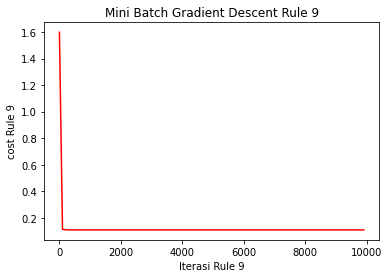

In [ ]:
plt.xlabel("Iterasi Rule 9")
plt.ylabel("cost Rule 9")
plt.title("Mini Batch Gradient Descent Rule 9")
plt.plot(mb_iterasi_rule9_list,mb_cost_rule9_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule9

0.1083856250468653

In [ ]:
mb_b0_rule9

0.15530000431133328

In [ ]:
mb_bpoly_rule9

array([ 1.14986586, -0.8868109 ,  0.38076089])

###Regresi

In [ ]:
mb_regresi_rule9=pd.DataFrame([mb_bpoly_rule9], columns=['b1', 'b2', 'b3'])
mb_regresi_rule9

,b1,b2,b3
0,1.149866,-0.886811,0.380761


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule9 = mb_regresi_rule9.T

In [ ]:
y9_awal=np.dot(data,mb_bpoly_rule9)

In [ ]:
z9 = y9_awal + mb_b0_rule9
z9

array([[ 24.43872871],
       [ 24.70214059],
       [ 43.58620938],
       [ 37.76831447],
       [ 49.56790759],
       [ 49.54865214],
       [ 46.19659553],
       [ 68.84838428],
       [ 17.9399952 ],
       [ 35.06725424],
       [ 55.40326583],
       [ 49.19189752],
       [ 61.22315709],
       [ 33.65241738],
       [ 66.77276958],
       [ 41.1954466 ],
       [ 52.32998399],
       [ 38.76520645],
       [ 55.09107217],
       [ 37.0342333 ],
       [ 84.53044609],
       [ 24.0087106 ],
       [ 56.42917298],
       [ 57.20088848],
       [ 28.07439079],
       [ 51.45279276],
       [ 25.48522628],
       [ 65.92441943],
       [ 27.18363719],
       [ 30.47690964],
       [ 43.71894983],
       [ 38.76835487],
       [ 50.67109211],
       [ 67.57738256],
       [ 47.73501419],
       [ 36.29287818],
       [ 45.34491406],
       [ 23.96086696],
       [ 37.38061832],
       [ 52.56165045],
       [ 70.29999001],
       [ 45.79781436],
       [ 16.32029679],
       [ 32

In [ ]:
data2['z9'] = z9
data2

,BodyFat,z1,z2,z3,z4,z5,z6,z7,z8,z9
165,19.2,48.084568,6.316407,23.187074,-65.904319,88.541728,58.135164,145.446975,0.434147,24.438729
6,19.2,34.546891,-2.167666,17.674352,-69.733358,74.901006,57.330644,134.926069,-16.907350,24.702141
111,28.0,34.876755,2.900490,22.642269,-68.569114,75.010112,50.475211,139.565834,-6.294139,43.586209
172,20.5,31.670799,-1.649470,19.719335,-72.538592,73.210881,54.575551,139.145446,-16.062871,37.768314
115,16.7,23.854803,-3.790004,19.490539,-74.725694,65.515382,50.373803,136.575408,-20.372485,49.567908
...,...,...,...,...,...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451,76.816075,52.200377,143.894459,-7.599930,45.202352
75,18.5,19.912452,0.918472,24.659854,-73.258532,60.687789,39.707822,138.240816,-10.239133,75.944973
113,21.3,25.402933,-2.762818,20.420066,-74.943039,67.423362,50.571375,138.993688,-18.359554,50.824372
118,25.8,35.773646,0.837618,22.109100,-73.607458,78.509819,55.554649,146.110988,-11.280335,40.888002


###Komposisi Aturan

In [ ]:
data_rule_9=rule_9.iloc[:,0:12]
data_rule_9

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
0,23,69.967,172.085,12.3,Muda,Berat,Tinggi,normal,0.166667,0.300000,0.271186,0.0
32,27,76.203,180.975,11.8,Muda,Berat,Tinggi,normal,0.833333,0.533333,0.813559,0.0
161,33,88.904,185.420,14.6,Muda,Berat,Tinggi,normal,0.285714,0.933333,0.847354,0.0
145,24,70.760,179.705,14.2,Muda,Berat,Tinggi,normal,0.333333,0.333333,0.745763,0.0
7,25,79.832,184.150,12.4,Muda,Berat,Tinggi,normal,0.500000,0.633333,0.915197,0.0


In [ ]:
data_rule_9['alpha_predikat']=data_rule_9[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_9

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
0,23,69.967,172.085,12.3,Muda,Berat,Tinggi,normal,0.166667,0.300000,0.271186,0.0,0.166667
32,27,76.203,180.975,11.8,Muda,Berat,Tinggi,normal,0.833333,0.533333,0.813559,0.0,0.533333
161,33,88.904,185.420,14.6,Muda,Berat,Tinggi,normal,0.285714,0.933333,0.847354,0.0,0.285714
145,24,70.760,179.705,14.2,Muda,Berat,Tinggi,normal,0.333333,0.333333,0.745763,0.0,0.333333
7,25,79.832,184.150,12.4,Muda,Berat,Tinggi,normal,0.500000,0.633333,0.915197,0.0,0.500000


In [ ]:
print(data_rule_9.alpha_predikat)

0      0.166667
32     0.533333
161    0.285714
145    0.333333
7      0.500000
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data9=min(data_rule_9.alpha_predikat)
alpha_predikat_data9

0.16666666666666666

##Rule 10

In [ ]:
rule_10 = df_fuzz[df_fuzz['Rule']=="Jika X1 Paruhbaya X2 Berat X3 Normal maka Y obesitas"]
index=rule_10.index
data_rule_10=rule_10.iloc[:,0:4]
data_rule_10

,Age,Weight,Height,BodyFat
215,51,99.337,162.56,47.5
35,49,86.976,165.10,40.1
206,44,75.296,166.37,32.9


In [ ]:
data_rule_10.to_csv('hasilrule10.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule10=pd.read_csv('hasilrule10.csv',sep=',')
df_rule10

,Unnamed: 0,Age,Weight,Height,BodyFat
0,215,51,99.337,162.56,47.5
1,35,49,86.976,165.10,40.1
2,206,44,75.296,166.37,32.9


In [ ]:
df_rule10=df_rule10.drop(columns=['Unnamed: 0'])
df_rule10

,Age,Weight,Height,BodyFat
0,51,99.337,162.56,47.5
1,49,86.976,165.10,40.1
2,44,75.296,166.37,32.9


In [ ]:
from sklearn import preprocessing
sx10 = preprocessing.MinMaxScaler()
sy10 = preprocessing.MinMaxScaler()

scaled_X10 = sx10.fit_transform(data_rule_10.drop('BodyFat',axis='columns'))
scaled_y10 = sy10.fit_transform(data_rule_10['BodyFat'].values.reshape(rule_10.shape[0],1))

scaled_X10

array([[1.        , 1.        , 0.        ],
       [0.71428571, 0.4858367 , 0.66666667],
       [0.        , 0.        , 1.        ]])

In [ ]:
scaled_y10_reshape=scaled_y10.reshape(scaled_y10.shape[0],)
scaled_y10_reshape

array([1.        , 0.49315068, 0.        ])

In [ ]:
def mini_batch_gradient_descent_rule10(X10, y10, iterasi,  batch_size = 2, learning_rate = 0.004):

    jumlah_variabel_rule10 = X10.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule10 = np.ones(shape=(jumlah_variabel_rule10))       # b1, b2, ... b(jumlah variabel)
    b0_rule10 = 0                                         # b0 atau bias
    n = X10.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule10_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule10_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule10_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule10 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X10_smntr = X10[random_indices]
        y10_smntr = y10[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule10 = X10_smntr[j:j+batch_size]
            yj_rule10 = y10_smntr[j:j+batch_size]
            
            y10_pred = np.dot(bpoly_rule10, Xj_rule10.T) + b0_rule10          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule10_grad = -(2/len(Xj_rule10))*(Xj_rule10.T.dot(yj_rule10-y10_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule10_grad = -(2/len(Xj_rule10))*np.sum(yj_rule10-y10_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule10 = bpoly_rule10 - learning_rate * bpoly_rule10_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule10 = b0_rule10 - learning_rate * b0_rule10_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule10 in range(jumlah_variabel_rule10):
                bp_rule10=bpoly_rule10[jv_rule10]
                bp.append(bp_rule10)
            b_rule10=[b0_rule10]+bp
        
            cost_rule10 = np.mean(np.square(yj_rule10-y10_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule10_list.append(cost_rule10)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule10_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule10_list.append(b_rule10)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule10, b0_rule10, cost_rule10, b_rule10_list, cost_rule10_list, iterasi_rule10_list  # Output

In [ ]:
import time
mulai_rule10 = time.time()
mb_bpoly_rule10, mb_b0_rule10, mb_cost_rule10, mb_b_rule10_list, mb_cost_rule10_list, mb_iterasi_rule10_list=mini_batch_gradient_descent_rule10 (scaled_X10, 
                                                                                                                                        scaled_y10_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 2, 
                                                                                                                                        learning_rate = 0.004)
selesai_rule10 = time.time()
waktu_komputasi_rule10 = (selesai_rule10 - mulai_rule10)
print("Waktu Komputasi Rule 10: ",waktu_komputasi_rule10)

Waktu Komputasi Rule 10:  0.2737252712249756


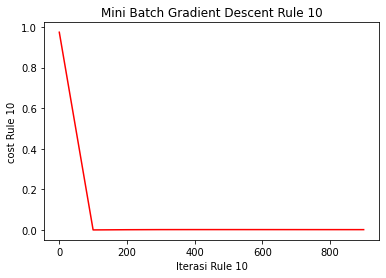

In [ ]:
plt.xlabel("Iterasi Rule 10")
plt.ylabel("cost Rule 10")
plt.title("Mini Batch Gradient Descent Rule 10")
plt.plot(mb_iterasi_rule10_list,mb_cost_rule10_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule10

0.0018329269574925194

In [ ]:
mb_b0_rule10

-0.5458003082693417

In [ ]:
mb_bpoly_rule10

array([0.63666632, 0.82488192, 0.50367262])

###Regresi

In [ ]:
mb_regresi_rule10=pd.DataFrame([mb_bpoly_rule10*0.1], columns=['b1', 'b2', 'b3'])
mb_regresi_rule10

,b1,b2,b3
0,0.063667,0.082488,0.050367


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule10 = mb_regresi_rule10.T

In [ ]:
y10_awal=np.dot(data,mb_bpoly_rule10)

In [ ]:
z10 = y10_awal + mb_b0_rule10
z10

array([[19.23680931],
       [16.80512856],
       [18.00366495],
       [17.39773189],
       [16.77197816],
       [16.88271539],
       [17.2161248 ],
       [18.350974  ],
       [17.73934694],
       [17.73630937],
       [20.85447479],
       [19.39916393],
       [18.0293032 ],
       [17.20703178],
       [17.56036574],
       [15.69955676],
       [16.80183259],
       [16.21554283],
       [18.22242218],
       [15.56350048],
       [18.54404103],
       [18.88108845],
       [18.60982646],
       [17.1690131 ],
       [19.32316824],
       [21.63206251],
       [20.27215366],
       [17.46865312],
       [17.60929645],
       [17.24444974],
       [17.69734023],
       [18.30683909],
       [17.20284585],
       [19.95437955],
       [18.97553942],
       [16.27893166],
       [17.16478693],
       [16.7795414 ],
       [19.40518855],
       [16.05772559],
       [17.89315645],
       [19.18859208],
       [17.76260713],
       [16.1388571 ],
       [17.70848097],
       [17

In [ ]:
data2['z10'] = z10
data2

,BodyFat,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10
165,19.2,48.084568,6.316407,23.187074,-65.904319,88.541728,58.135164,145.446975,0.434147,24.438729,19.236809
6,19.2,34.546891,-2.167666,17.674352,-69.733358,74.901006,57.330644,134.926069,-16.907350,24.702141,16.805129
111,28.0,34.876755,2.900490,22.642269,-68.569114,75.010112,50.475211,139.565834,-6.294139,43.586209,18.003665
172,20.5,31.670799,-1.649470,19.719335,-72.538592,73.210881,54.575551,139.145446,-16.062871,37.768314,17.397732
115,16.7,23.854803,-3.790004,19.490539,-74.725694,65.515382,50.373803,136.575408,-20.372485,49.567908,16.771978
...,...,...,...,...,...,...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451,76.816075,52.200377,143.894459,-7.599930,45.202352,18.514218
75,18.5,19.912452,0.918472,24.659854,-73.258532,60.687789,39.707822,138.240816,-10.239133,75.944973,17.520250
113,21.3,25.402933,-2.762818,20.420066,-74.943039,67.423362,50.571375,138.993688,-18.359554,50.824372,17.214245
118,25.8,35.773646,0.837618,22.109100,-73.607458,78.509819,55.554649,146.110988,-11.280335,40.888002,18.614342


###Komposisi Aturan

In [ ]:
data_rule_10=rule_10.iloc[:,0:12]
data_rule_10

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
215,51,99.337,162.56,47.5,Paruhbaya,Berat,Normal,obesitas,0.4,0.691781,0.50,0.044444
35,49,86.976,165.10,40.1,Paruhbaya,Berat,Normal,obesitas,0.6,0.866667,0.75,0.666667
206,44,75.296,166.37,32.9,Paruhbaya,Berat,Normal,obesitas,0.9,0.500000,0.50,0.622222


In [ ]:
data_rule_10['alpha_predikat']=data_rule_10[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_10

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
215,51,99.337,162.56,47.5,Paruhbaya,Berat,Normal,obesitas,0.4,0.691781,0.50,0.044444,0.4
35,49,86.976,165.10,40.1,Paruhbaya,Berat,Normal,obesitas,0.6,0.866667,0.75,0.666667,0.6
206,44,75.296,166.37,32.9,Paruhbaya,Berat,Normal,obesitas,0.9,0.500000,0.50,0.622222,0.5


In [ ]:
print(data_rule_10.alpha_predikat)

215    0.4
35     0.6
206    0.5
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data10=min(data_rule_10.alpha_predikat)
alpha_predikat_data10

0.4

##Rule 11

In [ ]:
rule_11 = df_fuzz[df_fuzz['Rule']=="Jika X1 Muda X2 Berat X3 Tinggi maka Y atletik"]
index=rule_11.index
data_rule_11=rule_11.iloc[:,0:4]
data_rule_11

,Age,Weight,Height,BodyFat
31,29,72.688,180.975,5.7
8,25,86.636,187.960,4.1
1,22,78.585,183.515,6.1


In [ ]:
data_rule_11.to_csv('hasilrule11.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule11=pd.read_csv('hasilrule11.csv',sep=',')
df_rule11

,Unnamed: 0,Age,Weight,Height,BodyFat
0,31,29,72.688,180.975,5.7
1,8,25,86.636,187.960,4.1
2,1,22,78.585,183.515,6.1


In [ ]:
df_rule11=df_rule11.drop(columns=['Unnamed: 0'])
df_rule11

,Age,Weight,Height,BodyFat
0,29,72.688,180.975,5.7
1,25,86.636,187.960,4.1
2,22,78.585,183.515,6.1


In [ ]:
from sklearn import preprocessing
sx11 = preprocessing.MinMaxScaler()
sy11 = preprocessing.MinMaxScaler()

scaled_X11 = sx11.fit_transform(data_rule_11.drop('BodyFat',axis='columns'))
scaled_y11 = sy11.fit_transform(data_rule_11['BodyFat'].values.reshape(rule_11.shape[0],1))

scaled_X11

array([[1.        , 0.        , 0.        ],
       [0.42857143, 1.        , 1.        ],
       [0.        , 0.42278463, 0.36363636]])

In [ ]:
scaled_y11_reshape=scaled_y11.reshape(scaled_y11.shape[0],)
scaled_y11_reshape

array([0.8, 0. , 1. ])

In [ ]:
def mini_batch_gradient_descent_rule11(X11, y11, iterasi, batch_size = 2, learning_rate = 0.004):

    jumlah_variabel_rule11 = X11.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule11 = np.ones(shape=(jumlah_variabel_rule11))       # b1, b2, ... b(jumlah variabel)
    b0_rule11 = 0                                         # b0 atau bias
    n = X11.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule11_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule11_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule11_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule11 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X11_smntr = X11[random_indices]
        y11_smntr = y11[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule11 = X11_smntr[j:j+batch_size]
            yj_rule11 = y11_smntr[j:j+batch_size]
            
            y11_pred = np.dot(bpoly_rule11, Xj_rule11.T) + b0_rule11          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule11_grad = -(2/len(Xj_rule11))*(Xj_rule11.T.dot(yj_rule11-y11_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule11_grad = -(2/len(Xj_rule11))*np.sum(yj_rule11-y11_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule11 = bpoly_rule11 - learning_rate * bpoly_rule11_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule11 = b0_rule11 - learning_rate * b0_rule11_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule11 in range(jumlah_variabel_rule11):
                bp_rule11=bpoly_rule11[jv_rule11]
                bp.append(bp_rule11)
            b_rule11=[b0_rule11]+bp
        
            cost_rule11 = np.mean(np.square(yj_rule11-y11_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule11_list.append(cost_rule11)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule11_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule11_list.append(b_rule11)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule11, b0_rule11, cost_rule11, b_rule11_list, cost_rule11_list, iterasi_rule11_list  # Output

In [ ]:
import time
mulai_rule11 = time.time()
mb_bpoly_rule11, mb_b0_rule11, mb_cost_rule11, mb_b_rule11_list, mb_cost_rule11_list, mb_iterasi_rule11_list=mini_batch_gradient_descent_rule11 (scaled_X11, 
                                                                                                                                        scaled_y11_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.004)
selesai_rule11 = time.time()
waktu_komputasi_rule11 = (selesai_rule11 - mulai_rule11)
print("Waktu Komputasi Rule 11: ",waktu_komputasi_rule11)

Waktu Komputasi Rule 11:  0.24083423614501953


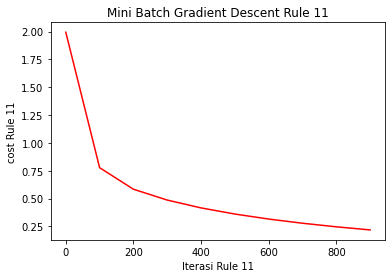

In [ ]:
plt.xlabel("Iterasi Rule 11")
plt.ylabel("cost Rule 11")
plt.title("Mini Batch Gradient Descent Rule 11")
plt.plot(mb_iterasi_rule11_list,mb_cost_rule11_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule11

0.19373842838158498

In [ ]:
mb_b0_rule11

0.42511254929520476

In [ ]:
mb_bpoly_rule11

array([ 0.41276605, -0.0459801 , -0.17154778])

###Regresi

In [ ]:
mb_regresi_rule11=pd.DataFrame([mb_bpoly_rule11], columns=['b1', 'b2', 'b3'])
mb_regresi_rule11

,b1,b2,b3
0,0.412766,-0.04598,-0.171548


In [ ]:
data=X_test
data

,Age,Weight,Height
165,35,98.429,187.325
6,26,82.100,177.165
111,43,83.121,177.800
172,35,80.399,180.340
115,40,71.668,175.895
...,...,...,...
119,44,85.049,183.515
75,61,67.245,171.450
113,42,73.935,178.435
118,40,86.636,187.960


In [ ]:
mb_bpoly_rule11 = mb_regresi_rule11.T

In [ ]:
y11_awal=np.dot(data,mb_bpoly_rule11)

In [ ]:
z11 = y11_awal + mb_b0_rule11
z11

array([[-21.78903846],
       [-23.01019845],
       [-16.14905405],
       [-19.76175601],
       [-16.5339436 ],
       [-16.77788   ],
       [-14.79901849],
       [ -6.91475951],
       [-26.24228349],
       [-22.29740252],
       [-10.40566034],
       [-13.53036704],
       [-10.14655364],
       [-21.6306859 ],
       [-10.69783568],
       [-23.84434594],
       [-15.56297045],
       [-17.2806881 ],
       [-14.75855824],
       [-20.69274814],
       [ -2.44872543],
       [-22.39615911],
       [-13.6297387 ],
       [-11.27055477],
       [-18.14549335],
       [ -8.5905552 ],
       [-19.85883564],
       [-11.0949685 ],
       [-25.18944699],
       [-19.75287938],
       [-17.68748825],
       [-19.7436856 ],
       [-13.2646425 ],
       [ -8.82521497],
       [-13.8263224 ],
       [-22.90636857],
       [-16.75290084],
       [-21.37058679],
       [-17.57528792],
       [-15.40696947],
       [-11.25502769],
       [-16.20089464],
       [-22.37408642],
       [-24

In [ ]:
data2['z11'] = z11
data2

,BodyFat,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11
165,19.2,48.084568,6.316407,23.187074,-65.904319,88.541728,58.135164,145.446975,0.434147,24.438729,19.236809,-21.789038
6,19.2,34.546891,-2.167666,17.674352,-69.733358,74.901006,57.330644,134.926069,-16.907350,24.702141,16.805129,-23.010198
111,28.0,34.876755,2.900490,22.642269,-68.569114,75.010112,50.475211,139.565834,-6.294139,43.586209,18.003665,-16.149054
172,20.5,31.670799,-1.649470,19.719335,-72.538592,73.210881,54.575551,139.145446,-16.062871,37.768314,17.397732,-19.761756
115,16.7,23.854803,-3.790004,19.490539,-74.725694,65.515382,50.373803,136.575408,-20.372485,49.567908,16.771978,-16.533944
...,...,...,...,...,...,...,...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451,76.816075,52.200377,143.894459,-7.599930,45.202352,18.514218,-16.805333
75,18.5,19.912452,0.918472,24.659854,-73.258532,60.687789,39.707822,138.240816,-10.239133,75.944973,17.520250,-6.899957
113,21.3,25.402933,-2.762818,20.420066,-74.943039,67.423362,50.571375,138.993688,-18.359554,50.824372,17.214245,-16.248380
118,25.8,35.773646,0.837618,22.109100,-73.607458,78.509819,55.554649,146.110988,-11.280335,40.888002,18.614342,-19.291898


###Komposisi Aturan

In [ ]:
data_rule_11=rule_11.iloc[:,0:12]
data_rule_11

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat
31,29,72.688,180.975,5.7,Muda,Berat,Tinggi,atletik,0.857143,0.400000,0.813559,0.0
8,25,86.636,187.960,4.1,Muda,Berat,Tinggi,atletik,0.500000,0.866667,0.711669,0.0
1,22,78.585,183.515,6.1,Muda,Berat,Tinggi,atletik,0.000000,0.600000,0.983039,0.0


In [ ]:
data_rule_11['alpha_predikat']=data_rule_11[['miu_Age','miu_Weight','miu_Height']].min(axis=1)
data_rule_11

,Age,Weight,Height,BodyFat,Age_fuzz,Weight_fuzz,Height_fuzz,BodyFat_fuzz,miu_Age,miu_Weight,miu_Height,miu_BodyFat,alpha_predikat
31,29,72.688,180.975,5.7,Muda,Berat,Tinggi,atletik,0.857143,0.400000,0.813559,0.0,0.4
8,25,86.636,187.960,4.1,Muda,Berat,Tinggi,atletik,0.500000,0.866667,0.711669,0.0,0.5
1,22,78.585,183.515,6.1,Muda,Berat,Tinggi,atletik,0.000000,0.600000,0.983039,0.0,0.0


In [ ]:
print(data_rule_11.alpha_predikat)

31    0.4
8     0.5
1     0.0
Name: alpha_predikat, dtype: float64


In [ ]:
alpha_predikat_data11=min(data_rule_11.alpha_predikat)
alpha_predikat_data11

0.0

#Prediksi

##Semua Komposisi Aturan

In [ ]:
Alpha_predikat = np.array([alpha_predikat_data1, alpha_predikat_data2, alpha_predikat_data3, alpha_predikat_data4, 
                           alpha_predikat_data5, alpha_predikat_data6, alpha_predikat_data7, alpha_predikat_data8, 
                           alpha_predikat_data9, alpha_predikat_data10, alpha_predikat_data11])
Alpha_predikat = pd.DataFrame([Alpha_predikat], columns=['alpha_predikat_data1', 'alpha_predikat_data2', 'alpha_predikat_data3', 
                                                  'alpha_predikat_data4', 'alpha_predikat_data5', 'alpha_predikat_data6', 
                                                 'alpha_predikat_data7', 'alpha_predikat_data8', 'alpha_predikat_data9', 
                                                 'alpha_predikat_data10', 'alpha_predikat_data11'])
Alpha_predikat = Alpha_predikat.T
Alpha_predikat

,0
alpha_predikat_data1,0.000000
alpha_predikat_data2,0.000000
alpha_predikat_data3,0.033243
alpha_predikat_data4,0.000000
alpha_predikat_data5,0.000000
alpha_predikat_data6,0.000000
alpha_predikat_data7,0.000000
alpha_predikat_data8,0.076923
alpha_predikat_data9,0.166667
alpha_predikat_data10,0.400000


In [ ]:
total_alpha=Alpha_predikat.sum()
total_alpha

0    0.676833
dtype: float64

##Nilai Keluaran

In [ ]:
Defuzz=data2.drop(columns=['BodyFat']) #drop untuk memotong tabel
Defuzz

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11
165,48.084568,6.316407,23.187074,-65.904319,88.541728,58.135164,145.446975,0.434147,24.438729,19.236809,-21.789038
6,34.546891,-2.167666,17.674352,-69.733358,74.901006,57.330644,134.926069,-16.907350,24.702141,16.805129,-23.010198
111,34.876755,2.900490,22.642269,-68.569114,75.010112,50.475211,139.565834,-6.294139,43.586209,18.003665,-16.149054
172,31.670799,-1.649470,19.719335,-72.538592,73.210881,54.575551,139.145446,-16.062871,37.768314,17.397732,-19.761756
115,23.854803,-3.790004,19.490539,-74.725694,65.515382,50.373803,136.575408,-20.372485,49.567908,16.771978,-16.533944
...,...,...,...,...,...,...,...,...,...,...,...
119,35.246808,2.454253,23.088007,-71.283451,76.816075,52.200377,143.894459,-7.599930,45.202352,18.514218,-16.805333
75,19.912452,0.918472,24.659854,-73.258532,60.687789,39.707822,138.240816,-10.239133,75.944973,17.520250,-6.899957
113,25.402933,-2.762818,20.420066,-74.943039,67.423362,50.571375,138.993688,-18.359554,50.824372,17.214245,-16.248380
118,35.773646,0.837618,22.109100,-73.607458,78.509819,55.554649,146.110988,-11.280335,40.888002,18.614342,-19.291898


##Hasil Defuzzifikasi

In [ ]:
Defuzzifikasi=(np.dot(Defuzz,Alpha_predikat))/0.676833
Defuzzifikasi

array([[18.57481263],
       [14.96093682],
       [21.7695707 ],
       [18.72505298],
       [20.75979829],
       [20.79498445],
       [21.65899692],
       [29.28889563],
       [13.94105464],
       [17.73936975],
       [29.34977229],
       [25.37542998],
       [26.550132  ],
       [17.17141812],
       [26.39519275],
       [15.21539461],
       [21.5549203 ],
       [18.39410095],
       [24.06430467],
       [15.87993847],
       [33.38453557],
       [17.80462833],
       [25.2108333 ],
       [24.46775975],
       [20.69653507],
       [30.64018279],
       [20.86119064],
       [26.00255787],
       [15.36447006],
       [17.63375237],
       [20.7326517 ],
       [20.02338365],
       [22.8513729 ],
       [30.37172738],
       [24.52502107],
       [15.75773556],
       [20.65001688],
       [15.54008179],
       [22.19295094],
       [20.69487702],
       [27.01805814],
       [23.54135188],
       [15.43067351],
       [14.22301937],
       [22.28194424],
       [19

In [ ]:
data2['Defuzzifikasi']=Defuzzifikasi
data2

,BodyFat,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,Defuzzifikasi
165,19.2,48.084568,6.316407,23.187074,-65.904319,88.541728,58.135164,145.446975,0.434147,24.438729,19.236809,-21.789038,18.574813
6,19.2,34.546891,-2.167666,17.674352,-69.733358,74.901006,57.330644,134.926069,-16.907350,24.702141,16.805129,-23.010198,14.960937
111,28.0,34.876755,2.900490,22.642269,-68.569114,75.010112,50.475211,139.565834,-6.294139,43.586209,18.003665,-16.149054,21.769571
172,20.5,31.670799,-1.649470,19.719335,-72.538592,73.210881,54.575551,139.145446,-16.062871,37.768314,17.397732,-19.761756,18.725053
115,16.7,23.854803,-3.790004,19.490539,-74.725694,65.515382,50.373803,136.575408,-20.372485,49.567908,16.771978,-16.533944,20.759798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,18.1,35.246808,2.454253,23.088007,-71.283451,76.816075,52.200377,143.894459,-7.599930,45.202352,18.514218,-16.805333,22.342756
75,18.5,19.912452,0.918472,24.659854,-73.258532,60.687789,39.707822,138.240816,-10.239133,75.944973,17.520250,-6.899957,29.102798
113,21.3,25.402933,-2.762818,20.420066,-74.943039,67.423362,50.571375,138.993688,-18.359554,50.824372,17.214245,-16.248380,21.604997
118,25.8,35.773646,0.837618,22.109100,-73.607458,78.509819,55.554649,146.110988,-11.280335,40.888002,18.614342,-19.291898,20.873178


In [ ]:
Hasil_akhir=data2.iloc[:,[0,12]]
Hasil_akhir

,BodyFat,Defuzzifikasi
165,19.2,18.574813
6,19.2,14.960937
111,28.0,21.769571
172,20.5,18.725053
115,16.7,20.759798
...,...,...
119,18.1,22.342756
75,18.5,29.102798
113,21.3,21.604997
118,25.8,20.873178


#Evaluasi model Mini Batch Gradient Descent

In [ ]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

##Eror

In [ ]:
num_data = 76
print('num_data:',num_data)    # number of records
aktual = Hasil_akhir.BodyFat
pred = Hasil_akhir.Defuzzifikasi

def mape(aktual, pred): 
    aktual, pred = np.array(aktual), np.array(pred)
    return np.mean(np.abs((aktual - pred) / aktual)) * 100

mse = mean_squared_error(aktual,pred)
rmse = math.sqrt(mse)
rse = math.sqrt(mse/(num_data-2))
mae=mean_absolute_error(aktual,pred)
mape=mape(aktual, pred)

print('MSE=',mse)
print('RSE=',rse)
print('RMSE=',rmse)
print('MAE=',mae)
print('MAPE=',mape)

num_data: 76
MSE= 83.65110212288396
RSE= 1.0632122548945206
RMSE= 9.146097644508501
MAE= 7.3094274156668195
MAPE= 61.8393551357415


###Membuat grafik

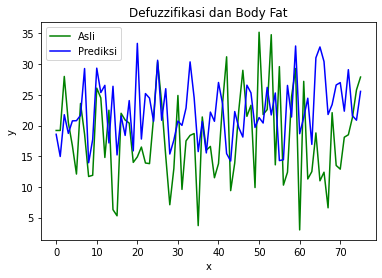

In [ ]:
# Define Data
x1 = np.arange(0,76)
aktual = Hasil_akhir.BodyFat
prediksi = Hasil_akhir.Defuzzifikasi

# Plot
plt.figure(figsize=(6,4))
plt.plot(x1, aktual,  label = "Asli",  color='green')
plt.plot(x1, pred, label = "Prediksi", color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Defuzzifikasi dan Body Fat')
plt.legend()
plt.savefig('Grafik Pred vs Aktual MBGD.png',format='png',dbi=1000) # Display
plt.show()

##Konfusi Matriks

In [ ]:
def bodyfat_kategori(row):
  if row.BodyFat < 10:
    return 'Atletik'
  elif 10 < row.BodyFat < 14:
    return 'Baik'
  elif 14 < row.BodyFat < 18:
    return 'Normal'
  elif 19 < row.BodyFat < 24:
    return 'Overweight'
  else:
    return 'Obesitas'
Hasil_akhir['Kategori_bodyfat']=Hasil_akhir.apply(bodyfat_kategori, axis=1)
Hasil_akhir 
  #apply fungsinya untuk menyimpan hasil dari looping (if (perulangan))
  #axis=1 berfungsi untuk membuat kolom secara horizontal
  #axis=0 berfungsi untuk membuat kolom secara vertikal

,BodyFat,Defuzzifikasi,Kategori_bodyfat
165,19.2,18.574813,Overweight
6,19.2,14.960937,Overweight
111,28.0,21.769571,Obesitas
172,20.5,18.725053,Overweight
115,16.7,20.759798,Normal
...,...,...,...
119,18.1,22.342756,Obesitas
75,18.5,29.102798,Obesitas
113,21.3,21.604997,Overweight
118,25.8,20.873178,Obesitas


In [ ]:
def defuzzifikasi_kategori(row):
  if row.Defuzzifikasi < 10:
    return 'Atletik'
  elif 10 < row.Defuzzifikasi < 14:
    return 'Baik'
  elif 14 < row.Defuzzifikasi < 18:
    return 'Normal'
  elif 19 < row.Defuzzifikasi < 24:
    return 'Overweight'
  else:
    return 'Obesitas'
Hasil_akhir['Kategori_Defuzzifikasi']=Hasil_akhir.apply(defuzzifikasi_kategori, axis=1)
Hasil_akhir 

,BodyFat,Defuzzifikasi,Kategori_bodyfat,Kategori_Defuzzifikasi
165,19.2,18.574813,Overweight,Obesitas
6,19.2,14.960937,Overweight,Normal
111,28.0,21.769571,Obesitas,Overweight
172,20.5,18.725053,Overweight,Obesitas
115,16.7,20.759798,Normal,Overweight
...,...,...,...,...
119,18.1,22.342756,Obesitas,Overweight
75,18.5,29.102798,Obesitas,Obesitas
113,21.3,21.604997,Overweight,Overweight
118,25.8,20.873178,Obesitas,Overweight


In [ ]:
Conf=metrics.confusion_matrix(Hasil_akhir.Kategori_bodyfat, Hasil_akhir.Kategori_Defuzzifikasi)
confusion=pd.DataFrame(Conf,index=['Atletik','Baik','Normal','Obesitas','Overweight'], columns=['Atletik','Baik','Normal','Obesitas','Overweight'])
confusion

,Atletik,Baik,Normal,Obesitas,Overweight
Atletik,0,0,4,2,3
Baik,0,1,4,10,3
Normal,0,0,2,3,3
Obesitas,0,0,3,11,8
Overweight,0,0,2,7,10


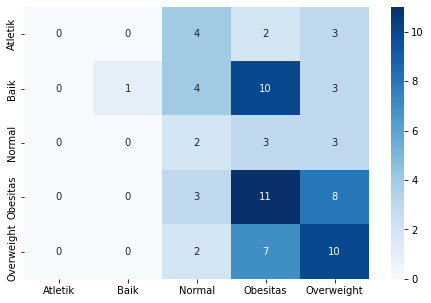

In [ ]:
fig = plt.figure(figsize=(17,5))
ax = plt.subplot(121)
sn.heatmap(confusion,annot=True,cmap='Blues')
fig.savefig('Confusion Matrix mbgd.png',format='png',dbi=1000) # Display

In [ ]:
confusion.shape[0]

5

In [ ]:
for i in range (confusion.shape[0]):
    TP=confusion.iloc[i,i]
    FP=confusion.iloc[i,:].sum()-TP
    FN=confusion.iloc[:,i].sum()-TP
    TN=confusion.sum().sum()-TP-FP-FN
    Accuracy = (TP+TN)/confusion.sum().sum()
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    print(confusion.index[i], Precision, Recall, F1_score)
    print('Precision =',Precision)
    print('Recall =',Recall)
    print('F1_score =',F1_score)

Atletik 0.0 nan nan
Precision = 0.0
Recall = nan
F1_score = nan
Baik 0.05555555555555555 1.0 0.10526315789473684
Precision = 0.05555555555555555
Recall = 1.0
F1_score = 0.10526315789473684
Normal 0.25 0.13333333333333333 0.1739130434782609
Precision = 0.25
Recall = 0.13333333333333333
F1_score = 0.1739130434782609
Obesitas 0.5 0.3333333333333333 0.4
Precision = 0.5
Recall = 0.3333333333333333
F1_score = 0.4
Overweight 0.5263157894736842 0.37037037037037035 0.43478260869565216
Precision = 0.5263157894736842
Recall = 0.37037037037037035
F1_score = 0.43478260869565216


In [ ]:
np.diag(confusion)

array([ 0,  1,  2, 11, 10])

In [ ]:
np.diag(confusion).sum()

24

In [ ]:
confusion.sum().sum()

76

In [ ]:
np.diag(confusion).sum()/confusion.sum().sum()

0.3157894736842105

In [ ]:
pd.DataFrame(classification_report(Hasil_akhir.Kategori_bodyfat, Hasil_akhir.Kategori_Defuzzifikasi, output_dict=True)).T

,precision,recall,f1-score,support
Atletik,0.000000,0.000000,0.000000,9.000000
Baik,1.000000,0.055556,0.105263,18.000000
Normal,0.133333,0.250000,0.173913,8.000000
Obesitas,0.333333,0.500000,0.400000,22.000000
Overweight,0.370370,0.526316,0.434783,19.000000
accuracy,0.315789,0.315789,0.315789,0.315789
macro avg,0.367407,0.266374,0.222792,76.000000
weighted avg,0.439961,0.315789,0.267723,76.000000


In [ ]:
from sklearn.metrics import balanced_accuracy_score
Kategori_bodyfat = Hasil_akhir.Kategori_bodyfat
Kategori_Defuzzifikasi =  Hasil_akhir.Kategori_Defuzzifikasi

In [ ]:
Kategori_bodyfat = Hasil_akhir.Kategori_bodyfat.to_numpy()
Kategori_Defuzzifikasi =  Hasil_akhir.Kategori_Defuzzifikasi.to_numpy()

In [ ]:
balanced_accuracy_score(Kategori_bodyfat, Kategori_Defuzzifikasi)

0.266374269005848